In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Set a fixed random seed
np.random.seed(42)

/var/folders/tv/bjxgwfxn7578_3m4cl8608dm0000gn/T/ipykernel_48540/2557598040.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [78]:
df = pd.read_excel('Louisana tank farms dset.xlsx')

df

,tank_id,farm_type,region,imaging_time,image_time_round_day,max_vol,fill_pct,tank volume,scene_id,provider_scene_id,scene_source_id,Location,tank_id.1,tank farm
0,082dc832-0355-4443-8d74-0bbe5a59ce23,REFINERY,padd3,2014-01-18T11:16:57.000000,2014-01-18,208035.532654,0.384068,79899.732773,054643765010_01_P001---207001017A163B00,103001002C3D8200,WV02,POINT(-91.20718456 30.47517597),082dc832-0355-4443-8d74-0bbe5a59ce23,9456
1,110aa251-7c5c-48c5-85dc-aac98b401e6c,REFINERY,padd3,2014-01-18T11:16:57.000000,2014-01-18,58083.897039,0.245030,14232.307369,054643765010_01_P001---207001017A163B00,103001002C3D8200,WV02,POINT(-91.21692658 30.47698114),110aa251-7c5c-48c5-85dc-aac98b401e6c,9456
2,1bae0ebf-883c-4c34-97ab-33016517ec43,REFINERY,padd3,2014-01-18T11:16:57.000000,2014-01-18,629576.864940,0.480066,302238.143471,054643765010_01_P001---207001017A163B00,103001002C3D8200,WV02,POINT(-91.22101618 30.4773222),1bae0ebf-883c-4c34-97ab-33016517ec43,9456
3,1ccdea2c-56ab-4ae4-a25b-023f48c1442c,REFINERY,padd3,2014-01-18T11:16:57.000000,2014-01-18,29136.899392,0.627026,18269.592691,054643765010_01_P001---207001017A163B00,103001002C3D8200,WV02,POINT(-91.20782668 30.47552346),1ccdea2c-56ab-4ae4-a25b-023f48c1442c,9456
4,205ad502-9b71-4e9e-86c1-835fa6c7e1f6,REFINERY,padd3,2014-01-18T11:16:57.000000,2014-01-18,20953.719142,0.768291,16098.562474,054643765010_01_P001---207001017A163B00,103001002C3D8200,WV02,POINT(-91.20785969 30.47517532),205ad502-9b71-4e9e-86c1-835fa6c7e1f6,9456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44680,e7540968-2382-48d7-aa3f-2b5108a26db1,TERMINAL,padd3,2018-04-05T12:01:46.000000,2018-04-05,234904.531997,0.487484,114512.135501,057782445010_01_P001---103001007A6AC200,103001007A6AC200,WV02,POINT(-89.9367856979403 29.9393607739819),e7540968-2382-48d7-aa3f-2b5108a26db1,undefined
44681,f1f72f60-ff4a-4a3b-86ec-0feb1aa4b6e3,REFINERY,padd3,2018-04-05T12:01:46.000000,2018-04-05,55582.655905,0.296094,16457.715266,057782445010_01_P001---103001007A6AC200,103001007A6AC200,WV02,POINT(-89.93917414 29.93484178),f1f72f60-ff4a-4a3b-86ec-0feb1aa4b6e3,9294
44682,f6e40339-e294-460d-b077-b1d0e1383ff5,REFINERY,padd3,2018-04-05T12:01:46.000000,2018-04-05,339019.718234,0.725951,246111.661608,057782445010_01_P001---103001007A6AC200,103001007A6AC200,WV02,POINT(-89.93626576 29.94053702),f6e40339-e294-460d-b077-b1d0e1383ff5,9294
44683,f97e1023-e233-485c-8ebb-da8cf91b85e7,REFINERY,padd3,2018-04-05T12:01:46.000000,2018-04-05,174125.667706,0.789281,137433.996768,057782445010_01_P001---103001007A6AC200,103001007A6AC200,WV02,POINT(-89.95787414 29.93026184),f97e1023-e233-485c-8ebb-da8cf91b85e7,9325


In [79]:
# print df shape
print(df.shape)

(44685, 14)


## Data Cleaning 

In [80]:
# dropping duplicates column 
df = df.drop(['tank_id.1'], axis = 1)

# dropping duplicates rows and rows with missing values
df.drop_duplicates(keep = 'first', inplace = True)
df.drop_duplicates(keep = 'first',subset = ['tank_id', 'imaging_time'], inplace = True)
df = df.dropna()




In [81]:
# dropping columns we don't need
df = df.drop(['region', 'imaging_time', 'scene_id', 'provider_scene_id', 'scene_source_id', ], axis = 1)

# dropping rows with undefined tank farms 
df = df[df['tank farm'] != 'undefined']

In [82]:
# print the new shape of the dataframe
print(df.shape)

df

(40182, 8)


,tank_id,farm_type,image_time_round_day,max_vol,fill_pct,tank volume,Location,tank farm
0,082dc832-0355-4443-8d74-0bbe5a59ce23,REFINERY,2014-01-18,208035.532654,0.384068,79899.732773,POINT(-91.20718456 30.47517597),9456
1,110aa251-7c5c-48c5-85dc-aac98b401e6c,REFINERY,2014-01-18,58083.897039,0.245030,14232.307369,POINT(-91.21692658 30.47698114),9456
2,1bae0ebf-883c-4c34-97ab-33016517ec43,REFINERY,2014-01-18,629576.864940,0.480066,302238.143471,POINT(-91.22101618 30.4773222),9456
3,1ccdea2c-56ab-4ae4-a25b-023f48c1442c,REFINERY,2014-01-18,29136.899392,0.627026,18269.592691,POINT(-91.20782668 30.47552346),9456
4,205ad502-9b71-4e9e-86c1-835fa6c7e1f6,REFINERY,2014-01-18,20953.719142,0.768291,16098.562474,POINT(-91.20785969 30.47517532),9456
...,...,...,...,...,...,...,...,...
44679,e348e4e6-633b-48e3-bc10-7c2994b6e259,REFINERY,2018-04-05,242858.703693,0.510077,123876.650174,POINT(-89.96415046 29.93144787),9325
44681,f1f72f60-ff4a-4a3b-86ec-0feb1aa4b6e3,REFINERY,2018-04-05,55582.655905,0.296094,16457.715266,POINT(-89.93917414 29.93484178),9294
44682,f6e40339-e294-460d-b077-b1d0e1383ff5,REFINERY,2018-04-05,339019.718234,0.725951,246111.661608,POINT(-89.93626576 29.94053702),9294
44683,f97e1023-e233-485c-8ebb-da8cf91b85e7,REFINERY,2018-04-05,174125.667706,0.789281,137433.996768,POINT(-89.95787414 29.93026184),9325


In [83]:
# create a dataset only for refineries
df_refineries = df[df['farm_type'] == 'REFINERY']

df_refineries

,tank_id,farm_type,image_time_round_day,max_vol,fill_pct,tank volume,Location,tank farm
0,082dc832-0355-4443-8d74-0bbe5a59ce23,REFINERY,2014-01-18,208035.532654,0.384068,79899.732773,POINT(-91.20718456 30.47517597),9456
1,110aa251-7c5c-48c5-85dc-aac98b401e6c,REFINERY,2014-01-18,58083.897039,0.245030,14232.307369,POINT(-91.21692658 30.47698114),9456
2,1bae0ebf-883c-4c34-97ab-33016517ec43,REFINERY,2014-01-18,629576.864940,0.480066,302238.143471,POINT(-91.22101618 30.4773222),9456
3,1ccdea2c-56ab-4ae4-a25b-023f48c1442c,REFINERY,2014-01-18,29136.899392,0.627026,18269.592691,POINT(-91.20782668 30.47552346),9456
4,205ad502-9b71-4e9e-86c1-835fa6c7e1f6,REFINERY,2014-01-18,20953.719142,0.768291,16098.562474,POINT(-91.20785969 30.47517532),9456
...,...,...,...,...,...,...,...,...
44679,e348e4e6-633b-48e3-bc10-7c2994b6e259,REFINERY,2018-04-05,242858.703693,0.510077,123876.650174,POINT(-89.96415046 29.93144787),9325
44681,f1f72f60-ff4a-4a3b-86ec-0feb1aa4b6e3,REFINERY,2018-04-05,55582.655905,0.296094,16457.715266,POINT(-89.93917414 29.93484178),9294
44682,f6e40339-e294-460d-b077-b1d0e1383ff5,REFINERY,2018-04-05,339019.718234,0.725951,246111.661608,POINT(-89.93626576 29.94053702),9294
44683,f97e1023-e233-485c-8ebb-da8cf91b85e7,REFINERY,2018-04-05,174125.667706,0.789281,137433.996768,POINT(-89.95787414 29.93026184),9325


In [84]:
# store in a list all the tank farms unique codes
tank_farms = df_refineries['tank farm'].unique()
tank_farms

# change the column name of tank farm to tank_farm
df = df.rename(columns = {'tank farm': 'tank_farm'})

# Dictionary to store the mean of value_counts for each farm
mean_value_counts = {}

# Loop through each tank farm
for farm_code in tank_farms:
    # Filter DataFrame for the current tank farm
    df_farm = df[df['tank_farm'] == farm_code]  # Assuming 'tank_farm' is the column name
    
    # Count the number of unique tanks
    num_unique_tanks = df_farm['tank_id'].nunique()
    
    # Count the occurrences of each tank ID
    tank_counts = df_farm['tank_id'].value_counts()
    
    # Calculate the mean of tank occurrences and store in the dictionary
    mean_value_counts[farm_code] = tank_counts.mean()

# Find the highest mean value
max_mean = max(mean_value_counts.values())

# Filter farms with the highest mean value
farms_with_highest_mean = [farm_code for farm_code, mean in mean_value_counts.items() if mean == max_mean]

# Print details for farms with the highest mean value
for farm_code in farms_with_highest_mean:
    print(f"Farm Code: {farm_code}")
    print(f"Number of Unique Tanks: {df[df['tank_farm'] == farm_code]['tank_id'].nunique()}")
    print(f"Mean of Tank Counts: {mean_value_counts[farm_code]}")
    print(f"Tank Counts:\n{df[df['tank_farm'] == farm_code]['tank_id'].value_counts()}")

Farm Code: 9294
Number of Unique Tanks: 13
Mean of Tank Counts: 93.23076923076923
Tank Counts:
tank_id
0a7add45-77bc-4381-a599-3e9b67de89ee    95
10b8a498-96ba-4372-9f58-130bb7d4d8ed    95
51d967dd-bf1a-4925-9263-090833345186    95
5246a78f-235e-4ae9-bd6d-1642d4e40dcf    95
d6fc92ad-4add-4f47-8773-40faf4172061    95
f1f72f60-ff4a-4a3b-86ec-0feb1aa4b6e3    95
9edea7ec-9274-45f6-9588-80f4b41e994c    94
c3946229-b4f9-440f-bcd4-2ccafb9cd73d    93
90b762c2-485b-4789-a24c-f6e901ef7c81    92
9606ab5e-f277-4daa-9b6e-971f1404c30d    92
f6e40339-e294-460d-b077-b1d0e1383ff5    92
dfb85f0d-6477-4df2-8100-ae07ab5e1e4c    91
8a6f4a9a-0d25-4088-80b1-50520009bbb9    88
Name: count, dtype: int64


In [85]:
#9325

# create a dataset only for the tank farm number 9294
df_9294 = df[df['tank_farm'] == 9294]

# drop the tank_farm column
df_9294 = df_9294.drop(['tank_farm', 'farm_type'], axis = 1)

# output the excel file
df_9294.to_excel('tank_farm_9294.xlsx', index = False)

In [86]:
df_9294

,tank_id,image_time_round_day,max_vol,fill_pct,tank volume,Location
396,0a7add45-77bc-4381-a599-3e9b67de89ee,2014-01-22,172503.258974,0.267927,46218.302496,POINT(-89.93739642 29.93392853)
397,10b8a498-96ba-4372-9f58-130bb7d4d8ed,2014-01-22,88310.831203,0.421111,37188.700141,POINT(-89.94028704 29.93709307)
398,51d967dd-bf1a-4925-9263-090833345186,2014-01-22,76798.574548,0.323487,24843.356725,POINT(-89.9396001 29.93407486)
399,5246a78f-235e-4ae9-bd6d-1642d4e40dcf,2014-01-22,80255.897759,0.275189,22085.531728,POINT(-89.94025234 29.93520642)
401,8a6f4a9a-0d25-4088-80b1-50520009bbb9,2014-01-22,76077.393395,0.274932,20916.087823,POINT(-89.93983735 29.93602112)
...,...,...,...,...,...,...
44674,c3946229-b4f9-440f-bcd4-2ccafb9cd73d,2018-04-05,341268.257932,0.675712,230599.000382,POINT(-89.93722277 29.94188651)
44676,d6fc92ad-4add-4f47-8773-40faf4172061,2018-04-05,84579.803151,0.729982,61741.693849,POINT(-89.94066637 29.93445874)
44677,dfb85f0d-6477-4df2-8100-ae07ab5e1e4c,2018-04-05,193228.265613,0.484378,93595.534797,POINT(-89.93782283 29.93490452)
44681,f1f72f60-ff4a-4a3b-86ec-0feb1aa4b6e3,2018-04-05,55582.655905,0.296094,16457.715266,POINT(-89.93917414 29.93484178)


In [87]:
# Filter the dataset to include data from January 2016 to March 2018
df_9294_subset = df_9294[
    (df_9294['image_time_round_day'] >= '2014-01-01') & 
    (df_9294['image_time_round_day'] <= '2018-03-31')
]
df_9294_subset

,tank_id,image_time_round_day,max_vol,fill_pct,tank volume,Location
396,0a7add45-77bc-4381-a599-3e9b67de89ee,2014-01-22,172503.258974,0.267927,46218.302496,POINT(-89.93739642 29.93392853)
397,10b8a498-96ba-4372-9f58-130bb7d4d8ed,2014-01-22,88310.831203,0.421111,37188.700141,POINT(-89.94028704 29.93709307)
398,51d967dd-bf1a-4925-9263-090833345186,2014-01-22,76798.574548,0.323487,24843.356725,POINT(-89.9396001 29.93407486)
399,5246a78f-235e-4ae9-bd6d-1642d4e40dcf,2014-01-22,80255.897759,0.275189,22085.531728,POINT(-89.94025234 29.93520642)
401,8a6f4a9a-0d25-4088-80b1-50520009bbb9,2014-01-22,76077.393395,0.274932,20916.087823,POINT(-89.93983735 29.93602112)
...,...,...,...,...,...,...
44182,c3946229-b4f9-440f-bcd4-2ccafb9cd73d,2018-03-25,341268.257932,0.382124,130406.656998,POINT(-89.93722277 29.94188651)
44184,d6fc92ad-4add-4f47-8773-40faf4172061,2018-03-25,84579.803151,0.298462,25243.816702,POINT(-89.94066637 29.93445874)
44185,dfb85f0d-6477-4df2-8100-ae07ab5e1e4c,2018-03-25,193228.265613,0.288909,55825.338820,POINT(-89.93782283 29.93490452)
44189,f1f72f60-ff4a-4a3b-86ec-0feb1aa4b6e3,2018-03-25,55582.655905,0.216185,12016.125924,POINT(-89.93917414 29.93484178)


In [88]:
# count each time the tanks appear in the dataset for farm 9456 from year 2016 to 2018
print(df_9294_subset['tank_id'].value_counts())

# calculate the average value counts of the tanks in farm 9456 from 2016 to 2018
value_count_mean = df_9294_subset['tank_id'].value_counts().mean() * 0.9
print(value_count_mean)


tank_id
0a7add45-77bc-4381-a599-3e9b67de89ee    93
10b8a498-96ba-4372-9f58-130bb7d4d8ed    93
51d967dd-bf1a-4925-9263-090833345186    93
5246a78f-235e-4ae9-bd6d-1642d4e40dcf    93
d6fc92ad-4add-4f47-8773-40faf4172061    93
f1f72f60-ff4a-4a3b-86ec-0feb1aa4b6e3    93
9edea7ec-9274-45f6-9588-80f4b41e994c    92
c3946229-b4f9-440f-bcd4-2ccafb9cd73d    91
90b762c2-485b-4789-a24c-f6e901ef7c81    90
9606ab5e-f277-4daa-9b6e-971f1404c30d    90
f6e40339-e294-460d-b077-b1d0e1383ff5    90
dfb85f0d-6477-4df2-8100-ae07ab5e1e4c    89
8a6f4a9a-0d25-4088-80b1-50520009bbb9    86
Name: count, dtype: int64
82.1076923076923


In [89]:
# removing tank_id that appears less than the average value count for tanks with too few images
df_9294_subset = df_9294_subset.groupby('tank_id').filter(lambda x: len(x) > value_count_mean)
print(df_9294_subset['tank_id'].value_counts())


tank_id
0a7add45-77bc-4381-a599-3e9b67de89ee    93
10b8a498-96ba-4372-9f58-130bb7d4d8ed    93
51d967dd-bf1a-4925-9263-090833345186    93
5246a78f-235e-4ae9-bd6d-1642d4e40dcf    93
d6fc92ad-4add-4f47-8773-40faf4172061    93
f1f72f60-ff4a-4a3b-86ec-0feb1aa4b6e3    93
9edea7ec-9274-45f6-9588-80f4b41e994c    92
c3946229-b4f9-440f-bcd4-2ccafb9cd73d    91
90b762c2-485b-4789-a24c-f6e901ef7c81    90
9606ab5e-f277-4daa-9b6e-971f1404c30d    90
f6e40339-e294-460d-b077-b1d0e1383ff5    90
dfb85f0d-6477-4df2-8100-ae07ab5e1e4c    89
8a6f4a9a-0d25-4088-80b1-50520009bbb9    86
Name: count, dtype: int64


In [90]:
# export the dataset to a new excel file
df_9294_subset.to_excel('df_9294_subset.xlsx', index = False)

In [91]:
# store in a dictionary for each tank the max_vol
max_vol_dict = {}
for tank_id in df_9294_subset['tank_id'].unique():
    max_vol_dict[tank_id] = df_9294_subset[df_9294_subset['tank_id'] == tank_id]['max_vol'].max()
    
print(max_vol_dict)

# calculate the max tank volume for the farm summing all the dict values
max_vol = sum(max_vol_dict.values())
print(max_vol)




{'0a7add45-77bc-4381-a599-3e9b67de89ee': 172503.258974048, '10b8a498-96ba-4372-9f58-130bb7d4d8ed': 88310.8312030654, '51d967dd-bf1a-4925-9263-090833345186': 76798.5745481821, '5246a78f-235e-4ae9-bd6d-1642d4e40dcf': 80255.8977585394, '8a6f4a9a-0d25-4088-80b1-50520009bbb9': 76077.3933954922, '90b762c2-485b-4789-a24c-f6e901ef7c81': 374392.010067122, '9606ab5e-f277-4daa-9b6e-971f1404c30d': 211696.093311596, '9edea7ec-9274-45f6-9588-80f4b41e994c': 221577.621716084, 'c3946229-b4f9-440f-bcd4-2ccafb9cd73d': 341268.257931878, 'd6fc92ad-4add-4f47-8773-40faf4172061': 84579.8031508256, 'dfb85f0d-6477-4df2-8100-ae07ab5e1e4c': 193228.265613275, 'f1f72f60-ff4a-4a3b-86ec-0feb1aa4b6e3': 55582.6559048942, 'f6e40339-e294-460d-b077-b1d0e1383ff5': 339019.718234359}
2315290.381809361


In [92]:
# list the columns of df_9456_subset
df_9294_subset.columns

Index(['tank_id', 'image_time_round_day', 'max_vol', 'fill_pct', 'tank volume',
       'Location'],
      dtype='object')

In [93]:
df_9294_subset['image_time_round_day'] = pd.to_datetime(df_9294_subset['image_time_round_day'])

# Group by 'image_time_round_day' and calculate the average 'fill_pct' across all tanks for each day
daily_avg_fill_pct = df_9294_subset.groupby('image_time_round_day')['fill_pct'].mean()

# Converting the Series to a DataFrame for better visualization and potential export
daily_avg_fill_pct_df = daily_avg_fill_pct.reset_index()
daily_avg_fill_pct_df.set_index('image_time_round_day', inplace=True)

# add a column with the max_vol
daily_avg_fill_pct_df['max_vol'] = max_vol

# add a column containing tanks_volume
daily_avg_fill_pct_df['tanks_volume'] = daily_avg_fill_pct_df['max_vol'] * daily_avg_fill_pct_df['fill_pct']

print(daily_avg_fill_pct_df)

# Optionally, output this data to an Excel file
daily_avg_fill_pct_df.to_excel('daily_average_fill_pct.xlsx', index=True)


                      fill_pct       max_vol  tanks_volume
image_time_round_day                                      
2014-01-22            0.515255  2.315290e+06  1.192965e+06
2014-03-09            0.571276  2.315290e+06  1.322670e+06
2014-05-26            0.623685  2.315290e+06  1.444012e+06
2014-06-06            0.531752  2.315290e+06  1.231160e+06
2014-10-20            0.572925  2.315290e+06  1.326487e+06
...                        ...           ...           ...
2018-03-09            0.537721  2.315290e+06  1.244981e+06
2018-03-14            0.492609  2.315290e+06  1.140534e+06
2018-03-15            0.505797  2.315290e+06  1.171067e+06
2018-03-21            0.604888  2.315290e+06  1.400491e+06
2018-03-25            0.394155  2.315290e+06  9.125827e+05

[84 rows x 3 columns]


In [94]:
daily_avg_fill_pct_df

,fill_pct,max_vol,tanks_volume
image_time_round_day,,,
2014-01-22,0.515255,2.315290e+06,1.192965e+06
2014-03-09,0.571276,2.315290e+06,1.322670e+06
2014-05-26,0.623685,2.315290e+06,1.444012e+06
2014-06-06,0.531752,2.315290e+06,1.231160e+06
2014-10-20,0.572925,2.315290e+06,1.326487e+06
...,...,...,...
2018-03-09,0.537721,2.315290e+06,1.244981e+06
2018-03-14,0.492609,2.315290e+06,1.140534e+06
2018-03-15,0.505797,2.315290e+06,1.171067e+06


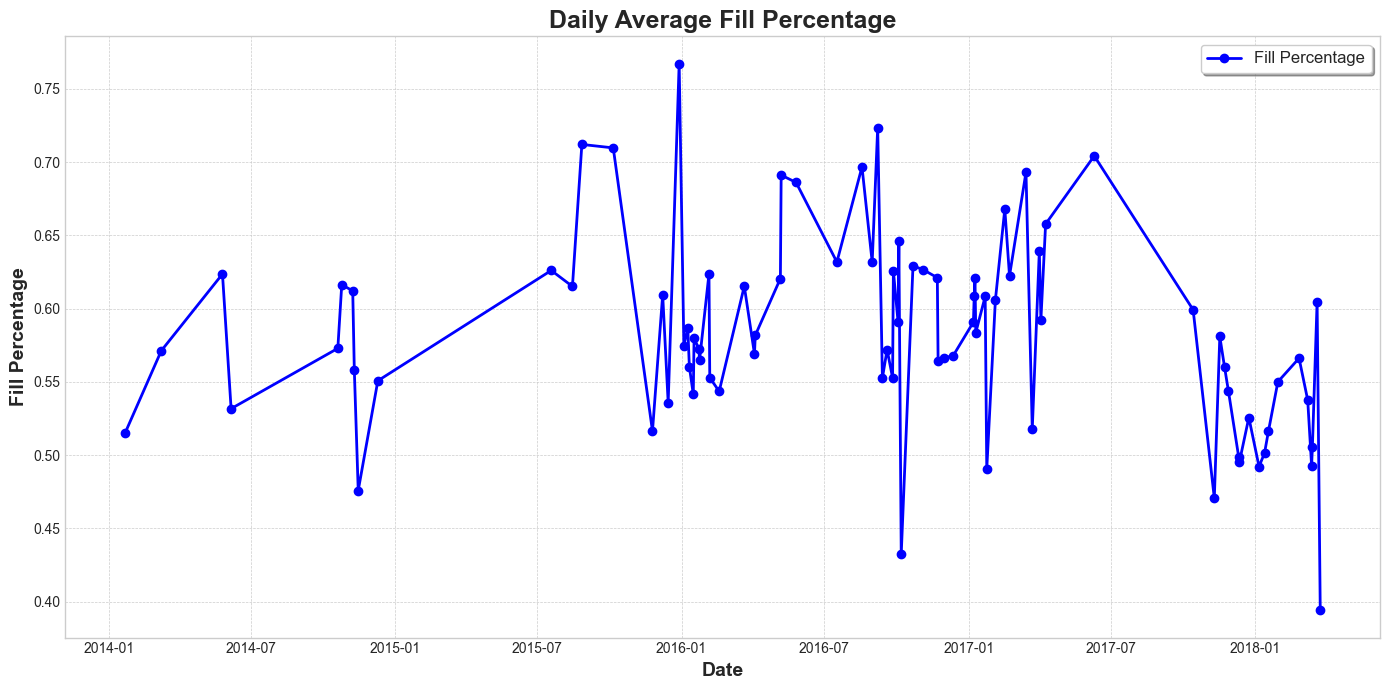

In [95]:
# direct interpolation between data 
# Apply the Seaborn style for a nicer look
plt.style.use('seaborn-v0_8-whitegrid')

# Adjust figure size to match the example
plt.figure(figsize=(14, 7))

# Assuming 'daily_avg_fill_pct_df' is already defined and has a 'fill_pct' column
plt.plot(daily_avg_fill_pct_df.index, daily_avg_fill_pct_df['fill_pct'], 
         marker='o', linestyle='-', color='blue', linewidth=2, label='Fill Percentage')

# Set titles and labels with adjusted font sizes and weights
plt.title('Daily Average Fill Percentage', fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=14, fontweight='bold')
plt.ylabel('Fill Percentage', fontsize=14, fontweight='bold')

# Adjust legend appearance
plt.legend(fontsize=12, frameon=True, shadow=True)

# Ensure the grid is enabled for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

In [96]:
# Generate the date range
date_range = pd.date_range(start='2014-01-01', end='2018-03-31', freq='7D')

# Create the DataFrame
temporary_df = pd.DataFrame(index=date_range, columns=['fill_pct', 'max_vol', 'tanks_volume'])

# Fill the DataFrame with zeros
temporary_df.fillna(0, inplace=True)

# Set the name of the index
temporary_df = temporary_df.rename_axis('image_time_round_day')

# Output the DataFrame
print(temporary_df)

                      fill_pct  max_vol  tanks_volume
image_time_round_day                                 
2014-01-01                   0        0             0
2014-01-08                   0        0             0
2014-01-15                   0        0             0
2014-01-22                   0        0             0
2014-01-29                   0        0             0
...                        ...      ...           ...
2018-02-28                   0        0             0
2018-03-07                   0        0             0
2018-03-14                   0        0             0
2018-03-21                   0        0             0
2018-03-28                   0        0             0

[222 rows x 3 columns]


/var/folders/tv/bjxgwfxn7578_3m4cl8608dm0000gn/T/ipykernel_48540/2592567917.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  temporary_df.fillna(0, inplace=True)


In [97]:
# Select only the columns to merge
daily_avg_cols = daily_avg_fill_pct_df[['fill_pct', 'max_vol', 'tanks_volume']]
temporary_cols = temporary_df[['fill_pct', 'max_vol', 'tanks_volume']]

# Ensure the index is a datetime if dealing with time series data (if not already set)
daily_avg_cols.index = pd.to_datetime(daily_avg_cols.index)
temporary_cols.index = pd.to_datetime(temporary_cols.index)

# Sort indices (important for successful interpolation)
daily_avg_cols.sort_index(inplace=True)
temporary_cols.sort_index(inplace=True)

# Merge the selected columns using combine_first to respect index alignment
daily_avg_fill_pct_df_expanded = daily_avg_cols.combine_first(temporary_cols)

# Fill all the max_vol with the provided max_vol value
daily_avg_fill_pct_df_expanded['max_vol'] = max_vol


# Assuming daily_avg_fill_pct_df_expanded is your DataFrame
daily_avg_fill_pct_df_expanded.index = pd.to_datetime(daily_avg_fill_pct_df_expanded.index)
daily_avg_fill_pct_df_expanded.sort_index(inplace=True)

# Replace zeros with NaN and ensure data type compatibility
daily_avg_fill_pct_df_expanded['fill_pct'] = daily_avg_fill_pct_df_expanded['fill_pct'].replace(0, np.nan).astype(float)

## Apply exponential smoothing ##

# Here, ensure all values are float by using `astype(float)` if necessary
daily_avg_fill_pct_df_expanded['smoothed_fill_pct'] = daily_avg_fill_pct_df_expanded['fill_pct'].fillna(method='ffill').ewm(span=12, adjust=False).mean()

# Replace the original fill_pct with smoothed values where original data is NaN
mask = daily_avg_fill_pct_df_expanded['fill_pct'].isna()
daily_avg_fill_pct_df_expanded.loc[mask, 'fill_pct'] = daily_avg_fill_pct_df_expanded.loc[mask, 'smoothed_fill_pct']

# Drop the temporary smoothed column if no longer needed
daily_avg_fill_pct_df_expanded.drop(columns=['smoothed_fill_pct'], inplace=True)

# drop the first 8 rows
daily_avg_fill_pct_df_expanded = daily_avg_fill_pct_df_expanded.iloc[8:]

# calculate tank volume 
daily_avg_fill_pct_df_expanded['tanks_volume'] = daily_avg_fill_pct_df_expanded['max_vol'] * daily_avg_fill_pct_df_expanded['fill_pct']

# Check the result
print(daily_avg_fill_pct_df_expanded.head(20))


# Optionally save to Excel
daily_avg_fill_pct_df_expanded.to_excel('filled_daily_avg_fill_pct_inter.xlsx', index=True)

                      fill_pct       max_vol  tanks_volume
image_time_round_day                                      
2014-02-26            0.515255  2.315290e+06  1.192965e+06
2014-03-05            0.515255  2.315290e+06  1.192965e+06
2014-03-09            0.571276  2.315290e+06  1.322670e+06
2014-03-12            0.531166  2.315290e+06  1.229804e+06
2014-03-19            0.537337  2.315290e+06  1.244091e+06
2014-03-26            0.542558  2.315290e+06  1.256180e+06
2014-04-02            0.546977  2.315290e+06  1.266409e+06
2014-04-09            0.550715  2.315290e+06  1.275065e+06
2014-04-16            0.553878  2.315290e+06  1.282389e+06
2014-04-23            0.556555  2.315290e+06  1.288586e+06
2014-04-30            0.558820  2.315290e+06  1.293830e+06
2014-05-07            0.560736  2.315290e+06  1.298267e+06
2014-05-14            0.562358  2.315290e+06  1.302021e+06
2014-05-21            0.563730  2.315290e+06  1.305198e+06
2014-05-26            0.623685  2.315290e+06  1.444012e+

/var/folders/tv/bjxgwfxn7578_3m4cl8608dm0000gn/T/ipykernel_48540/1981879732.py:30: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  daily_avg_fill_pct_df_expanded['smoothed_fill_pct'] = daily_avg_fill_pct_df_expanded['fill_pct'].fillna(method='ffill').ewm(span=12, adjust=False).mean()


In [98]:
daily_avg_fill_pct_df_expanded

,fill_pct,max_vol,tanks_volume
image_time_round_day,,,
2014-02-26,0.515255,2.315290e+06,1.192965e+06
2014-03-05,0.515255,2.315290e+06,1.192965e+06
2014-03-09,0.571276,2.315290e+06,1.322670e+06
2014-03-12,0.531166,2.315290e+06,1.229804e+06
2014-03-19,0.537337,2.315290e+06,1.244091e+06
...,...,...,...
2018-03-14,0.492609,2.315290e+06,1.140534e+06
2018-03-15,0.505797,2.315290e+06,1.171067e+06
2018-03-21,0.604888,2.315290e+06,1.400491e+06


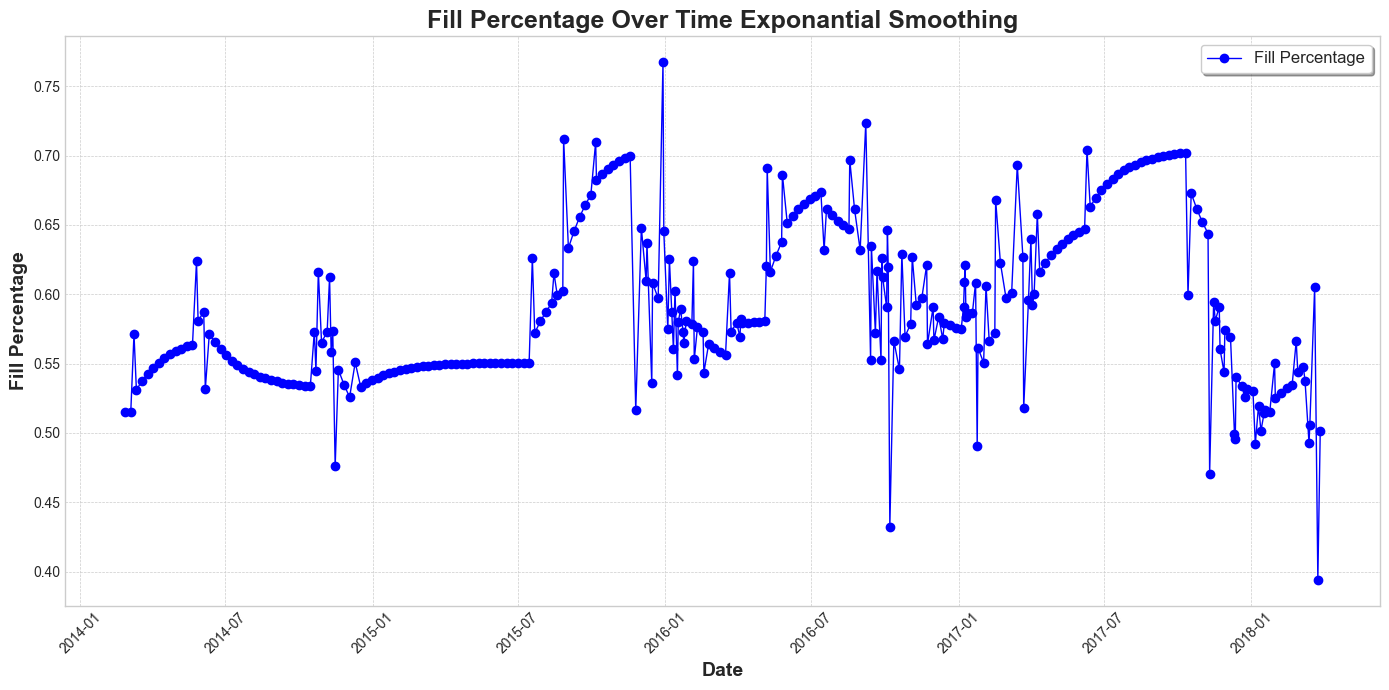

In [99]:
## EXPONENTIAL SMOOTHING TECHNINQUE 
# Apply the Seaborn style for a nicer look
plt.style.use('seaborn-v0_8-whitegrid')

# Create the plot with specified figure size
plt.figure(figsize=(14, 7))
plt.plot(daily_avg_fill_pct_df_expanded.index, daily_avg_fill_pct_df_expanded['fill_pct'], marker='o', linestyle='-', color='blue', linewidth=1, label='Fill Percentage')

# Highlight specific points if needed, here as an example
#max_fill_date = daily_avg_fill_pct_df_expanded['fill_pct'].idxmax()
#max_fill_pct = daily_avg_fill_pct_df_expanded['fill_pct'].max()
#plt.scatter(max_fill_date, max_fill_pct, color='red', s=100, label='Maximum Fill Percentage', zorder=5, edgecolor='black')

# Set titles and labels with adjusted font sizes and weights
plt.title('Fill Percentage Over Time Exponantial Smoothing', fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=14, fontweight='bold')
plt.ylabel('Fill Percentage', fontsize=14, fontweight='bold')

# Rotate x-ticks for better readability
plt.xticks(rotation=45)

# Adjust legend appearance
plt.legend(fontsize=12, frameon=True, shadow=True)

# Ensure the grid is enabled for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()


In [100]:
from scipy.interpolate import interp1d


# Define a function that interpolates with added noise to match variance
def interpolate_with_variance(start_date, end_date, variance, df):
    mask = (df.index >= pd.to_datetime(start_date)) & (df.index <= pd.to_datetime(end_date))
    date_range = df.loc[mask].index
    
    # Convert dates to ordinal for interpolation
    date_ordinal = np.array([d.toordinal() for d in date_range])
    
    # Simple linear interpolation for the trend
    trend_interp = interp1d([date_ordinal[0], date_ordinal[-1]], 
                            [df.loc[date_range[0], 'fill_pct'], df.loc[date_range[-1], 'fill_pct']])
    
    # Generate dates for interpolation
    date_ordinal_interp = np.linspace(date_ordinal[0], date_ordinal[-1], len(date_range))
    
    # Add random noise based on the variance of surrounding periods
    noise = np.random.normal(0, np.sqrt(variance), size=len(date_range))
    
    # Apply the interpolation and noise
    interpolated_values = trend_interp(date_ordinal_interp) + noise
    df.loc[mask, 'fill_pct'] = interpolated_values

# Calculate variance from surrounding periods
before_period_variance = daily_avg_fill_pct_df_expanded.loc['2014-10-01':'2014-12-25', 'fill_pct'].var()
after_period_variance = daily_avg_fill_pct_df_expanded.loc['2015-06-27':'2015-08-01', 'fill_pct'].var()
# calculate the average variance of the two periods weighted by 30% and 70%
#average_variance = (before_period_variance * 0.3) + (after_period_variance * 0.7)
average_variance = daily_avg_fill_pct_df_expanded.loc['2015-12-26':'2016-06-26', 'fill_pct'].var()


# Apply the custom interpolation function
interpolate_with_variance('2014-12-26', '2015-06-26', average_variance, daily_avg_fill_pct_df_expanded)
# measure the variance for next inerpolation
before_period_variance = daily_avg_fill_pct_df_expanded.loc['2017-04-01':'2017-07-01', 'fill_pct'].var()
before_period_variance = daily_avg_fill_pct_df_expanded.loc['2017-10-01':'2017-12-25', 'fill_pct'].var()
average_variance = (before_period_variance + after_period_variance)/2
interpolate_with_variance('2017-07-01', '2017-10-01', average_variance, daily_avg_fill_pct_df_expanded)
# Recalculate tank volume
daily_avg_fill_pct_df_expanded['tanks_volume'] = daily_avg_fill_pct_df_expanded['max_vol'] * daily_avg_fill_pct_df_expanded['fill_pct']


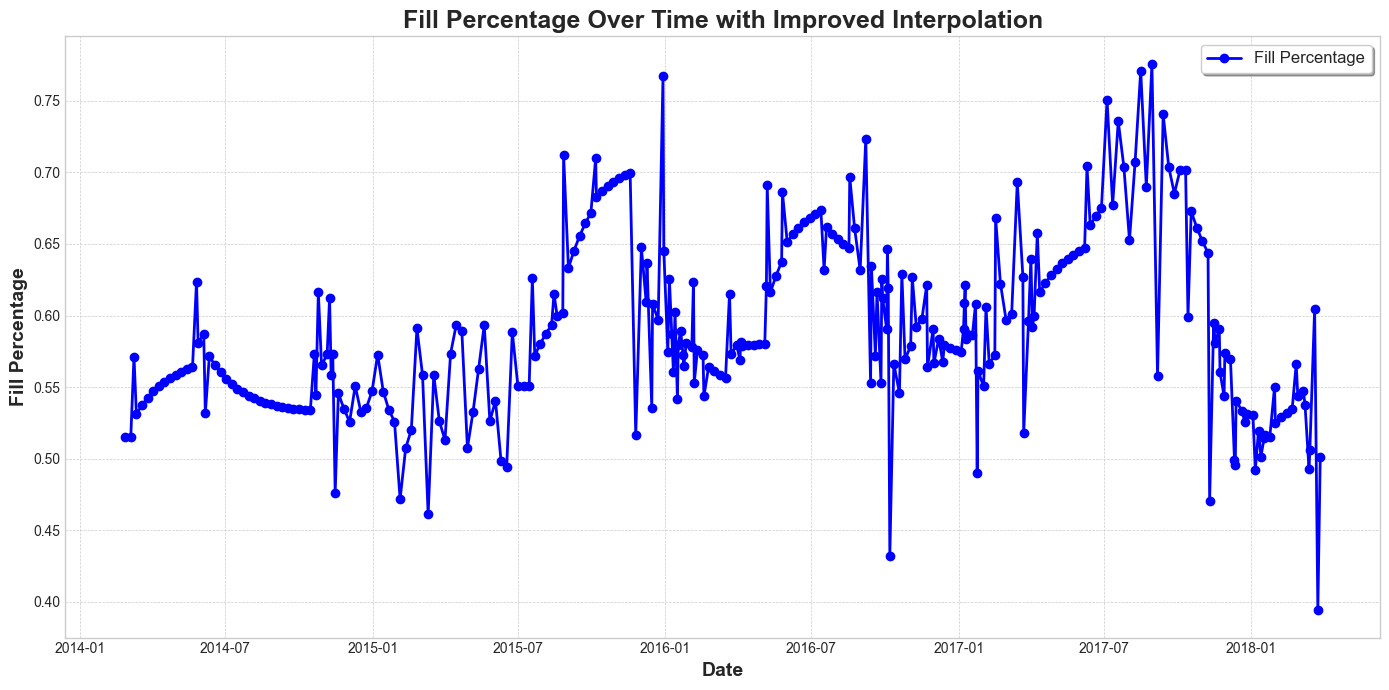

In [101]:
# Apply the Seaborn style for a consistent look
plt.style.use('seaborn-v0_8-whitegrid')

# Assuming daily_avg_fill_pct_df_expanded['fill_pct'] and the index are already defined
plt.figure(figsize=(14, 7))
plt.plot(daily_avg_fill_pct_df_expanded.index, daily_avg_fill_pct_df_expanded['fill_pct'], 
         label='Fill Percentage', linestyle='-', color='blue', linewidth=2, marker='o')

# Set titles and labels with adjusted font sizes and weights
plt.title('Fill Percentage Over Time with Improved Interpolation', fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=14, fontweight='bold')
plt.ylabel('Fill Percentage', fontsize=14, fontweight='bold')

# Adjust the legend appearance
plt.legend(fontsize=12, frameon=True, shadow=True)

# Ensure the grid is enabled for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Adjust layout for better spacing and possibly save the figure
plt.tight_layout()

# Display the plot
plt.show()

In [102]:
daily_avg_fill_pct_df_expanded

,fill_pct,max_vol,tanks_volume
image_time_round_day,,,
2014-02-26,0.515255,2.315290e+06,1.192965e+06
2014-03-05,0.515255,2.315290e+06,1.192965e+06
2014-03-09,0.571276,2.315290e+06,1.322670e+06
2014-03-12,0.531166,2.315290e+06,1.229804e+06
2014-03-19,0.537337,2.315290e+06,1.244091e+06
...,...,...,...
2018-03-14,0.492609,2.315290e+06,1.140534e+06
2018-03-15,0.505797,2.315290e+06,1.171067e+06
2018-03-21,0.604888,2.315290e+06,1.400491e+06


## PREDICTION ##

In [27]:
# stationarity test
from statsmodels.tsa.stattools import adfuller

result = adfuller(daily_avg_fill_pct_df_expanded['fill_pct'])

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Determine if the series is stationary based on the ADF test
if result[0] < result[4]["5%"]:
    print("The time series is stationary.")
else:
    print("The time series is not stationary.")

ADF Statistic: -1.901166
p-value: 0.331513
Critical Values:
	1%: -3.454
	5%: -2.872
	10%: -2.572
The time series is not stationary.


the time series is not stationary. This implies that the time series may have a structure, such as a trend or seasonality, that does not allow for the assumption of a constant mean and variance over time.

<Figure size 1400x700 with 0 Axes>

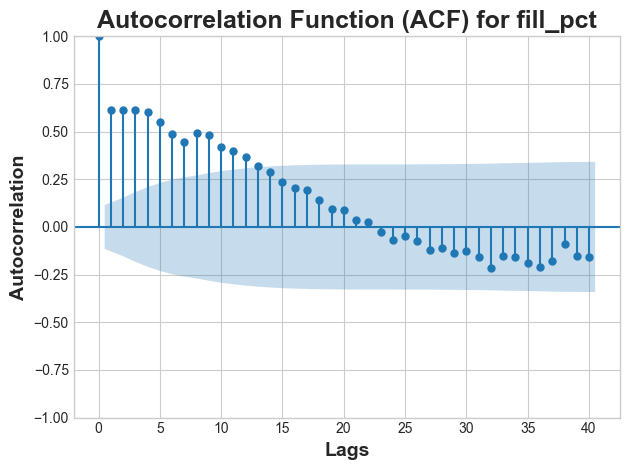

In [28]:
# meuasuring seasonality using autocorrelation function

from statsmodels.graphics.tsaplots import plot_acf
# Plotting the Autocorrelation Function (ACF) to identify seasonality

# Apply the Seaborn style
plt.style.use('seaborn-v0_8-whitegrid')

# Create the plot with a specified figure size
plt.figure(figsize=(14, 7))  # Adjusted to match previous plots
plot_acf(daily_avg_fill_pct_df_expanded['fill_pct'], lags=40, alpha=0.05)

# Set titles and labels with adjusted font sizes and weights
plt.title('Autocorrelation Function (ACF) for fill_pct', fontsize=18, fontweight='bold')
plt.xlabel('Lags', fontsize=14, fontweight='bold')
plt.ylabel('Autocorrelation', fontsize=14, fontweight='bold')

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()



The first lag has a very high autocorrelation close to 1, which indicates a strong positive correlation with the previous day. This suggests that the data has a high level of inertia or persistence, meaning today's value is closely related to yesterday's.

The autocorrelation is gradually decreasing as the number of lags increases, which is common in time series data that have a trend or are following a random walk process.

There are no clear, regularly spaced peaks in the ACF plot that would suggest strong seasonality. Seasonal data typically show spikes at regular intervals – for instance, if there was weekly seasonality, you might expect to see a spike at lag 7, 14, 21, and so on.

The confidence interval (the shaded area) helps us determine the significance of the autocorrelation. Points outside this area are considered statistically significant. In this plot, many of the initial lags are outside of the confidence interval, indicating significant autocorrelation at those lags.

The alternating positive and negative spikes towards the end of the plot indicate that there might be some complex patterns in the data that are not purely random, but without more context or additional analysis, it's hard to say whether this is due to noise or some underlying seasonal effect.

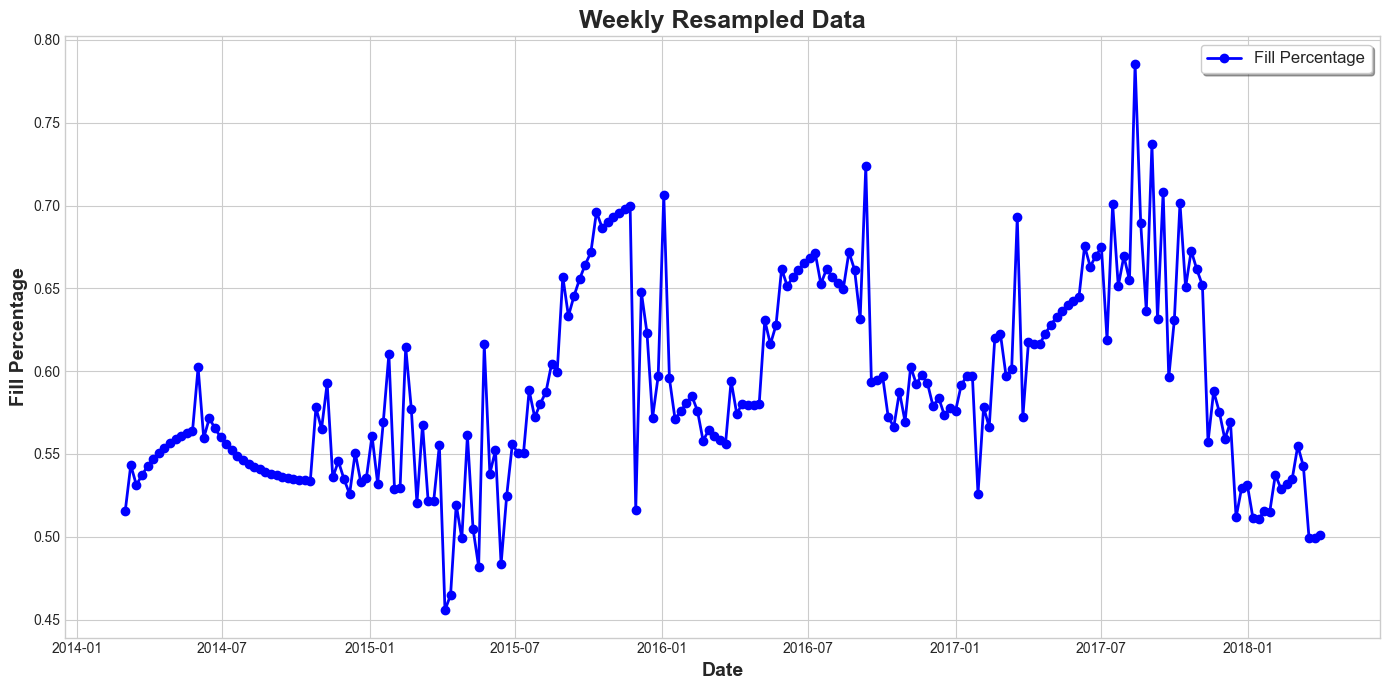

In [29]:
# Resample your time series to a regular weekly frequency, using mean to aggregate
weekly_resampled_data = daily_avg_fill_pct_df_expanded['fill_pct'].resample('W').mean()

# Apply the Seaborn style
plt.style.use('seaborn-v0_8-whitegrid')

# Create the plot with a specified figure size
plt.figure(figsize=(14, 7))  # Sizing matched to previous plots for consistency
plt.plot(weekly_resampled_data, marker='o', linestyle='-', color='blue', linewidth=2, label='Fill Percentage')  # Adding markers for better visibility of data points

# Set titles and labels with adjusted font sizes and weights
plt.title('Weekly Resampled Data', fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=14, fontweight='bold')
plt.ylabel('Fill Percentage', fontsize=14, fontweight='bold')

# legend
plt.legend(fontsize=12, frameon=True, shadow=True)

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

In [103]:
# Assuming daily_avg_fill_pct_df_expanded is already defined and fill_pct is the target variable
data = weekly_resampled_data

# Split the data into train validation and test sets (let's say last 20% of the data for testing)
# Calculate the indices for splitting the data
n_obs = len(data)
train_size = int(n_obs * 0.65)
validation_size = int(n_obs * 0.8)  # 15% for validation and 20% for test

train_data = data[:train_size]
validation_data = data[train_size:validation_size]
test_data = data[validation_size:]

# print the shape of the subset
print(train_data.shape)
print(validation_data.shape)
print(test_data.shape)

(139,)
(32,)
(43,)


## SARIMA MODEL 
an extension of the ARIMA model that adds seasonal terms. It can handle both the non-stationary nature of the data (through differencing) and the seasonal patterns (through seasonal components). Although the ACF plot did not strongly suggest seasonality, seasonal effects could be possible.

In [31]:
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error


In [32]:
# Define the search space for the SARIMAX parameters
space = {
    'p': hp.choice('p', range(0, 2)),  # Keep these simple; could even try p=0 or p=1 only
    'd': hp.choice('d', range(0, 2)),
    'q': hp.choice('q', range(0, 2)),
    'P': hp.choice('P', range(0, 1)),  # Reduce complexity in seasonal components
    'D': hp.choice('D', range(0, 1)),
    'Q': hp.choice('Q', range(0, 1)),
    'S': 7  # Keep weekly seasonality if it is justified by the data
}

# Objective function to minimize
# Objective function to minimize
def objective(params):
    try:
        model = SARIMAX(train_data, order=(params['p'], params['d'], params['q']),
                        seasonal_order=(params['P'], params['D'], params['Q'], params['S']),
                        enforce_stationarity=False,
                        enforce_invertibility=False)
        results = model.fit(disp=0)
        
        # Predict on the validation set
        predictions = results.get_forecast(steps=len(validation_data))
        predicted_mean = predictions.predicted_mean
        mse = mean_squared_error(validation_data, predicted_mean)
    except Exception as e:
        mse = np.inf
    return {'loss': mse, 'status': STATUS_OK}

In [33]:
# Trials object to track progress
trials = Trials()

# Run the optimizer
best_params = fmin(fn=objective,
                   space=space,
                   algo=tpe.suggest,
                   max_evals=50,  # Adjust this to the number of evaluations you're willing to run
                   trials=trials)

print("Best parameters:", best_params)
# print the best mse
print("Best MSE:", trials.best_trial['result']['loss'])


  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]

100%|██████████| 50/50 [00:01<00:00, 40.44trial/s, best loss: 0.0011822697568332416]
Best parameters: {'D': 0, 'P': 0, 'Q': 0, 'd': 0, 'p': 1, 'q': 1}
Best MSE: 0.0011822697568332416


In [34]:
# Convert hp.choice indices to actual values
best_params = {
    'p': best_params['p'],
    'd': best_params['d'],
    'q': best_params['q'],
    'P': best_params['P'],
    'D': best_params['D'],
    'Q': best_params['Q'],
    'S': 7  # Fixed value
}

# Fit the SARIMAX model with the best parameters on the training data
model = SARIMAX(train_data,
                order=(best_params['p'], best_params['d'], best_params['q']),
                seasonal_order=(best_params['P'], best_params['D'], best_params['Q'], best_params['S']),
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit(disp=0)  # Fit the model without displaying the fitting progress

# Predict on the test set
preds_test = results.get_forecast(steps=len(test_data))
predicted_mean_test = preds_test.predicted_mean

# Calculate the MSE for the test set
mse_test = mean_squared_error(test_data, predicted_mean_test)

# calculate RMSE
rmse_test = np.sqrt(mse_test)

# calculate MAE
mae_test = np.mean(np.abs(test_data - predicted_mean_test))


MSE on Test Data: 0.006212595633069348
RMSE on Test Data: 0.07882002050919137
MAE on Test Data: 0.0878807565851445


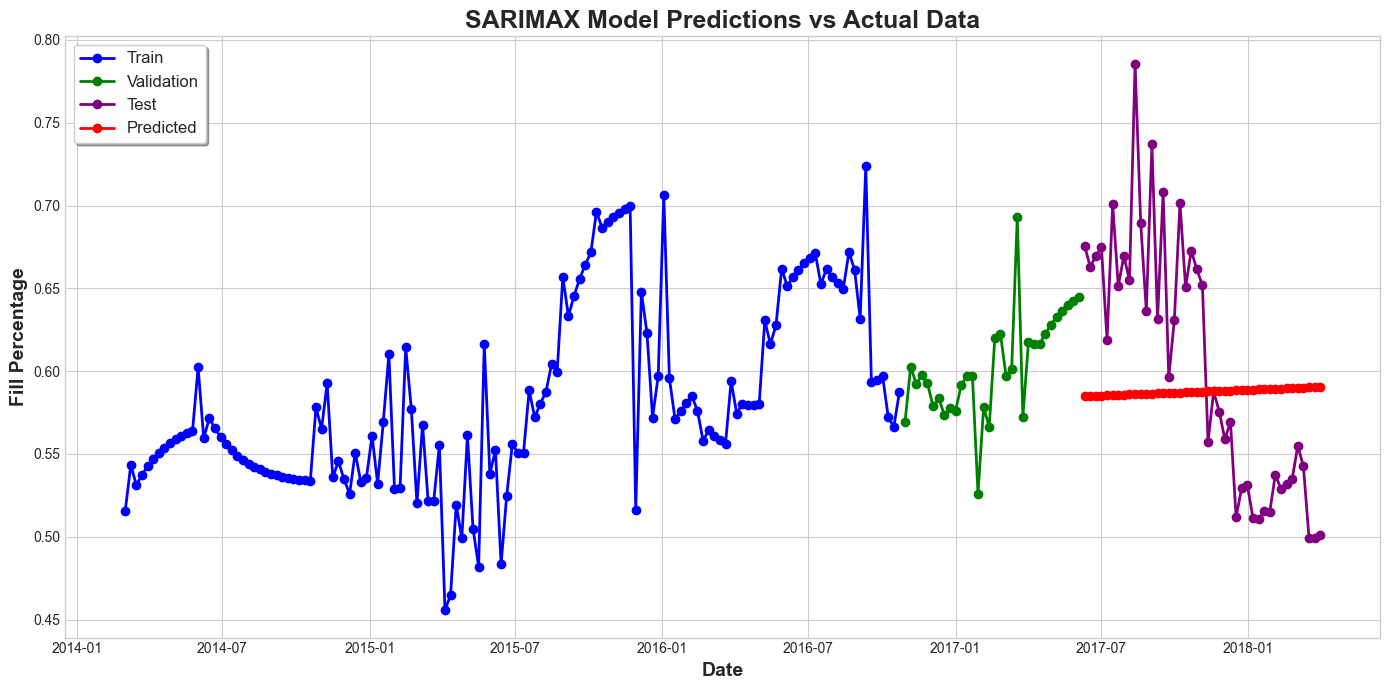

In [35]:
# MSE
print(f"MSE on Test Data: {mse_test}")

# RMSE
print(f"RMSE on Test Data: {rmse_test}")

# MAE
print(f"MAE on Test Data: {mae_test}")

## SARIMAX PLOT 
# Apply the Seaborn style
plt.style.use('seaborn-v0_8-whitegrid')

# Create the plot with a specified figure size
plt.figure(figsize=(14, 7))  # Adjusted to match previous plots for consistency
plt.plot(train_data.index, train_data, label='Train', marker='o', linestyle='-', color='blue', linewidth=2)
plt.plot(validation_data.index, validation_data, label='Validation', marker='o', linestyle='-', color='green', linewidth=2)
plt.plot(test_data.index, test_data, label='Test', marker='o', linestyle='-', color='purple', linewidth=2)
plt.plot(test_data.index, predicted_mean_test, label='Predicted', color='red', marker='o', linestyle='-', linewidth=2)

# Set titles and labels with adjusted font sizes and weights
plt.title('SARIMAX Model Predictions vs Actual Data', fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=14, fontweight='bold')
plt.ylabel('Fill Percentage', fontsize=14, fontweight='bold')

# Adjust the legend
plt.legend(fontsize=12, frameon=True, shadow=True, loc='upper left')

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()


In [36]:
# meausure the variance of the data
variance = test_data.var()
print(variance)

0.00589585775624822


## SLIDING WIDNDOWS TO SAMPLE MORE DATA

In [104]:
# Suppose you select a window size of 12 weeks
window_size = 8

# Construct the lagged features for SARIMAX
data_lagged = pd.concat([data.shift(i) for i in range(window_size+1)], axis=1).dropna()
data_lagged.columns = ['t+' + str(i) if i != 0 else 'current' for i in range(window_size, -1, -1)]

# Split into train and test sets
train_lagged = data_lagged[:int(len(data) * 0.65)]
validation_lagged = data_lagged[int(len(data) * 0.65):int(len(data) * 0.80)]
test_lagged = data_lagged[int(len(data) * 0.80):]

# print shapr of the data lagged
print(train_lagged.shape)
print(validation_lagged.shape)
print(test_lagged.shape)



(139, 9)
(32, 9)
(35, 9)


In [105]:
space = {
    'p': hp.choice('p', range(0, 3)),  # Slightly expanded range
    'd': hp.choice('d', range(0, 3)),
    'q': hp.choice('q', range(0, 3)),
    'P': hp.choice('P', range(0, 3)),  # Allowing for a non-zero seasonal AR component
    'D': hp.choice('D', range(0, 3)),  # Allowing for non-zero seasonal differencing
    'Q': hp.choice('Q', range(0, 3)),  # Allowing for a non-zero seasonal MA component
    'S': 7  # Keep weekly seasonality
}

In [106]:
def objective(params):
    # Convert the integer indices (which hyperopt uses) to actual parameter values
    p, d, q = params['p'], params['d'], params['q']
    P, D, Q, S = params['P'], params['D'], params['Q'], params['S']
    
    try:
        model = SARIMAX(endog=train_lagged['current'],
                        exog=train_lagged.drop(columns='current'),
                        order=(p, d, q),
                        seasonal_order=(P, D, Q, S),
                        enforce_stationarity=False,
                        enforce_invertibility=False)
        results = model.fit(disp=0, maxiter=1000)
        
        exog_validation = validation_lagged.drop(columns='current')
        preds = results.get_prediction(start=exog_validation.index[0], 
                                       end=exog_validation.index[-1],
                                       exog=exog_validation)
        mse = mean_squared_error(validation_lagged['current'], preds.predicted_mean)
        return {'loss': mse, 'status': STATUS_OK}
    
    except Exception as e:
        return {'loss': float('inf'), 'status': STATUS_OK}


In [107]:
# Trials object to track progress
trials = Trials()

# Run the optimizer
best_params = fmin(fn=objective,
                   space=space,
                   algo=tpe.suggest,
                   max_evals=100,  # Adjust this to the number of evaluations you're willing to run
                   trials=trials)

print("Best parameters:", best_params)
# print the best mse
print("Best MSE:", trials.best_trial['result']['loss'])

  9%|▉         | 9/100 [00:15<02:37,  1.73s/trial, best loss: 0.0023653363582309514]

/Users/francescostocchi/anaconda3/envs/advance_machine_learning/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



 38%|███▊      | 38/100 [01:11<02:05,  2.03s/trial, best loss: 0.0009650686253054701]

/Users/francescostocchi/anaconda3/envs/advance_machine_learning/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



 86%|████████▌ | 86/100 [02:37<00:29,  2.10s/trial, best loss: 0.0008217743746633888]

/Users/francescostocchi/anaconda3/envs/advance_machine_learning/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



100%|██████████| 100/100 [02:52<00:00,  1.72s/trial, best loss: 0.000746744784698672]
Best parameters: {'D': 0, 'P': 0, 'Q': 0, 'd': 0, 'p': 1, 'q': 1}
Best MSE: 0.000746744784698672


In [108]:
# Convert hp.choice indices to actual values
best_params_values = {
    'p': best_params['p'],
    'd': best_params['d'],
    'q': best_params['q'],
    'P': best_params['P'],
    'D': best_params['D'],
    'Q': best_params['Q'],
    'S': 7  # Fixed value
}


In [109]:
# Fit the SARIMAX model with the best parameters on the training data
best_model_sliding = SARIMAX(endog=train_lagged['current'],
                     exog=train_lagged.drop(columns='current'),
                     order=(best_params_values['p'], best_params_values['d'], best_params_values['q']),
                     seasonal_order=(best_params_values['P'], best_params_values['D'], best_params_values['Q'], best_params_values['S']),
                     enforce_stationarity=False,
                     enforce_invertibility=False)

results_sliding = best_model_sliding.fit(disp=0)

# Predict on the test set
exog_test = test_lagged.drop(columns='current')
preds_test = results_sliding.get_forecast(steps=len(test_lagged),
                                  exog=exog_test)
predicted_mean_test_sliding = preds_test.predicted_mean

# Calculate the MSE for the test set
mse_test_sliding = mean_squared_error(test_lagged['current'], predicted_mean_test_sliding)
print(f"MSE on Test Data: {mse_test_sliding}")

# calcaluta the RMSE for the test set
rmse_test_sliding = np.sqrt(mse_test_sliding)
print(f"RMSE on Test Data: {rmse_test_sliding}")

# calculat MAE
mae_test_sliding = np.mean(np.abs(test_lagged['current'] - predicted_mean_test_sliding))
print(f"MAE on Test Data: {mae_test_sliding}")


MSE on Test Data: 0.0022700122699194757
RMSE on Test Data: 0.04764464576339587
MAE on Test Data: 0.14082033691106857


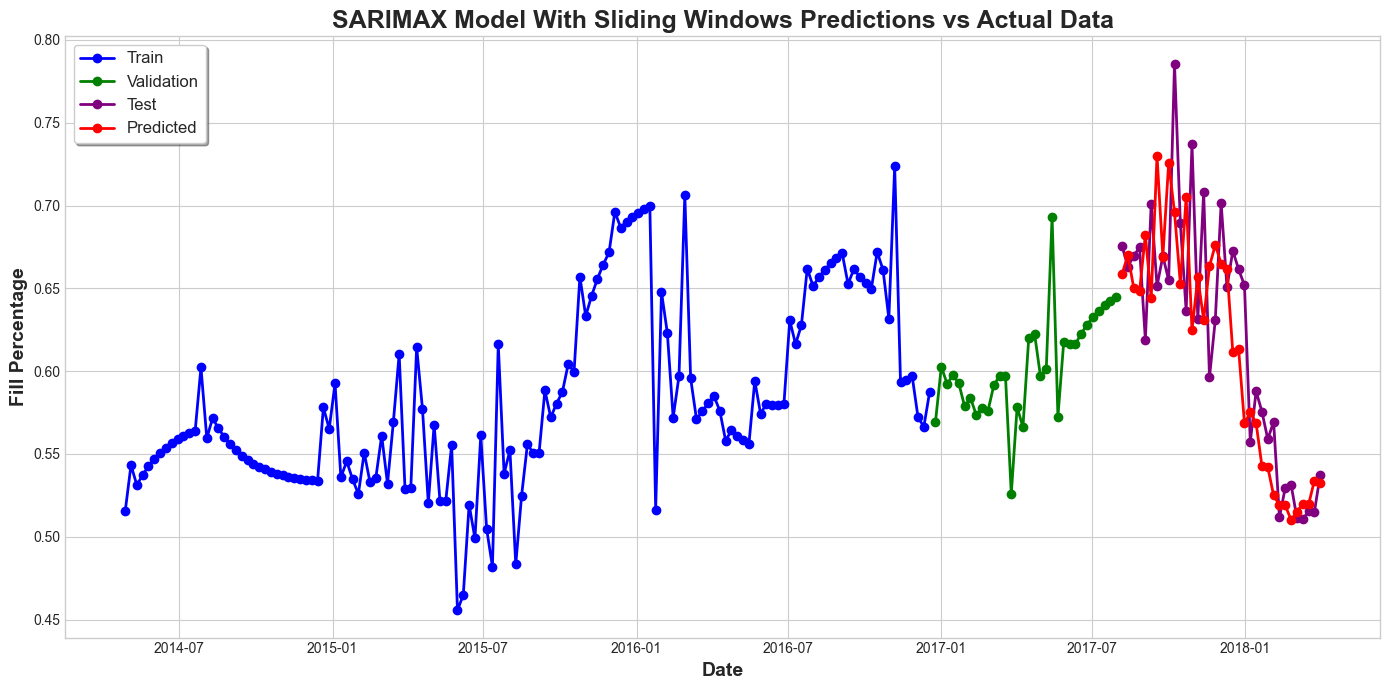

In [116]:
# Apply the Seaborn style
plt.style.use('seaborn-v0_8-whitegrid')

# Create the plot with a specified figure size
plt.figure(figsize=(14, 7))  # Increased size for better visibility and consistency with previous plots
plt.plot(train_lagged.index, train_lagged['current'], label='Train', marker='o', linestyle='-', color='blue', linewidth=2)
plt.plot(validation_lagged.index, validation_lagged['current'], label='Validation', marker='o', linestyle='-', color='green', linewidth=2)
plt.plot(test_lagged.index, test_lagged['current'], label='Test', marker='o', linestyle='-', color='purple', linewidth=2)
plt.plot(test_lagged.index, predicted_mean_test_sliding, label='Predicted', color='red', marker='o', linestyle='-', linewidth=2)

# Set titles and labels with adjusted font sizes and weights
plt.title('SARIMAX Model With Sliding Windows Predictions vs Actual Data', fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=14, fontweight='bold')
plt.ylabel('Fill Percentage', fontsize=14, fontweight='bold')

# Adjust the legend
plt.legend(fontsize=12, frameon=True, shadow=True, loc='upper left')

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

## ARIMA MODEL 

In [44]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK

In [45]:
# Define the objective function for Bayesian optimization
def objective(params):
    order = (int(params['p']), int(params['d']), int(params['q']))
    try:
        # Using the 'lbfgs' solver with increased maxiter
        model = ARIMA(train_data, order=order)
        model_fit = model.fit(method='lbfgs', maxiter=500)
        predictions = model_fit.forecast(len(validation_data))
        mse = mean_squared_error(validation_data, predictions)
        return {'loss': mse, 'status': STATUS_OK}
    except Exception as e:
        return {'loss': np.inf, 'status': STATUS_OK}
    
    
# Define the search space
space = {
    'p': hp.quniform('p', 0, 3, 1),  # Reduced upper limit
    'd': hp.quniform('d', 0, 2, 1),
    'q': hp.quniform('q', 0, 3, 1)   # Reduced upper limit
}


In [46]:
# Run the optimizer
trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=100,
            trials=trials)

best_order = (int(best['p']), int(best['d']), int(best['q']))

# output the best hyperparameters
print("Best Hyperparameters:", best_order)

# output the best mse
print("Best MSE:", trials.best_trial['result']['loss'])


100%|██████████| 100/100 [00:00<00:00, 161.79trial/s, best loss: inf]
Best Hyperparameters: (0, 1, 1)
Best MSE: inf


In [47]:
# Refit the model with the best parameters on the full training dataset (train + validation)
final_model = ARIMA(pd.concat([train_data, validation_data]), order=best_order)
final_model_fit = final_model.fit()

# Forecast on the test set
test_predictions = final_model_fit.forecast(len(test_data))

# calculate MSE
test_mse = mean_squared_error(test_data, test_predictions)
print("Test MSE:", test_mse)

# Calculat RMSE
test_rmse = np.sqrt(test_mse)
print("Test RMSE:", test_rmse)

# calculate MAE
test_mae = np.mean(np.abs(test_data - test_predictions))
print("Test MAE:", test_mae)


Test MSE: 0.00716838557239697
Test RMSE: 0.08466631899638115
Test MAE: 0.07130281350549167


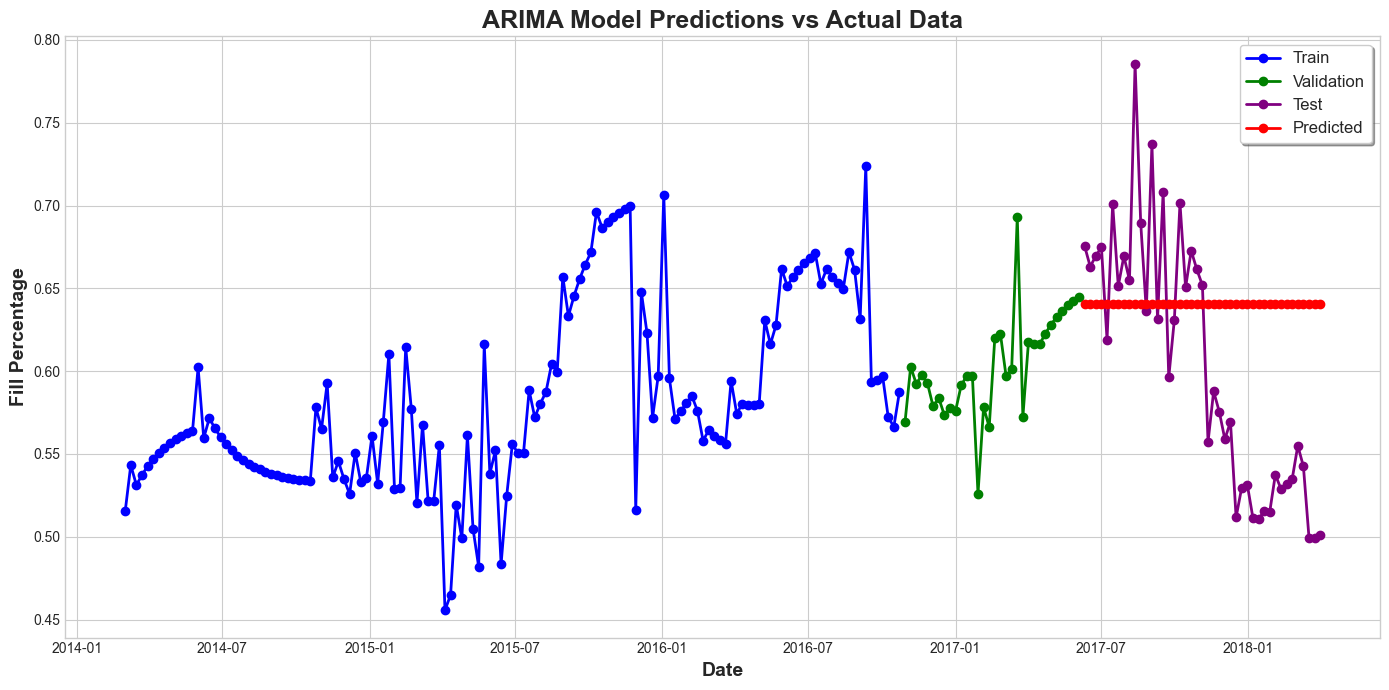

In [48]:
# Apply the Seaborn style
plt.style.use('seaborn-v0_8-whitegrid')

# Create the plot with a specified figure size
plt.figure(figsize=(14, 7))  # Increased size for better visibility and consistency with previous plots
plt.plot(train_data.index, train_data, label='Train', marker='o', linestyle='-', color='blue', linewidth=2)
plt.plot(validation_data.index, validation_data, label='Validation', marker='o', linestyle='-', color='green', linewidth=2)
plt.plot(test_data.index, test_data, label='Test', marker='o', linestyle='-', color='purple', linewidth=2)
plt.plot(test_data.index, test_predictions, label='Predicted', color='red', marker='o', linestyle='-', linewidth=2)

# Set titles and labels with adjusted font sizes and weights
plt.title('ARIMA Model Predictions vs Actual Data', fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=14, fontweight='bold')
plt.ylabel('Fill Percentage', fontsize=14, fontweight='bold')

# Adjust the legend
plt.legend(fontsize=12, frameon=True, shadow=True)

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

## SLIDING WINDOWS FOR TRAINING

In [49]:
# Define window sizes
window_size = 30  # Reduced window size to ensure it's less than the length of test data
step_size = 1     # Predict one step at a time

# Split the data into train and test sets
n = len(data)
train_data_sliding_arima = data.iloc[:int(n * 0.8)]  # Let's say 80% of the data for training
test_data_sliding_arima = data.iloc[int(n * 0.8):]   # Remaining 20% for testing

# Collect all predictions and actuals
all_predictions = []
all_actuals = []

# Adjust initial indices based on the new window size
start_index = 0
end_index = window_size

# Iterate through the test data
while start_index + step_size <= len(test_data_sliding_arima):
    # Define the training window - combining train and part of the test to simulate real-time forecasting
    if start_index == 0:
        combined_train = train_data_sliding_arima
    else:
        combined_train = pd.concat([train_data_sliding_arima, test_data_sliding_arima.iloc[:start_index]])

    # Fit ARIMA model on the combined training data each time to simulate model updates
    model = ARIMA(combined_train, order=(1, 1, 0))
    model_fit = model.fit()

    # Predict the next step
    predictions = model_fit.forecast(steps=1)
    all_predictions.extend(predictions)

    # Collect the actual values for comparison
    actual_value = test_data_sliding_arima.iloc[start_index]
    all_actuals.append(actual_value)

    # Move the window forward by one step
    start_index += step_size

# Evaluation
if all_actuals and all_predictions:
    final_mse = mean_squared_error(all_actuals, all_predictions, squared=False)
    final_rmse = np.sqrt(final_mse)
    final_mae = np.mean(np.abs(np.array(all_actuals) - np.array(all_predictions)))
    print("Final MSE on Test Set:", final_mse)
    print("Final RMSE on Test Set:", final_rmse)
    print("Final MAE on Test Set", final_mae)
else:
    print("Cannot compute MSE: no data available.")
    print("Cannot compute RMSE: no data available.")
    print("Cannot compute MAE: no data available.")




/Users/francescostocchi/anaconda3/envs/advance_machine_learning/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Final MSE on Test Set: 0.04200013587456382
Final RMSE on Test Set: 0.2049393468189157
Final MAE on Test Set 0.027707615605978377


/Users/francescostocchi/anaconda3/envs/advance_machine_learning/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [50]:
print("Length of test_indices:", len(test_data_sliding_arima))
print("Length of all_actuals:", len(all_actuals))
print("Length of all_predictions:", len(all_predictions))

Length of test_indices: 43
Length of all_actuals: 43
Length of all_predictions: 43


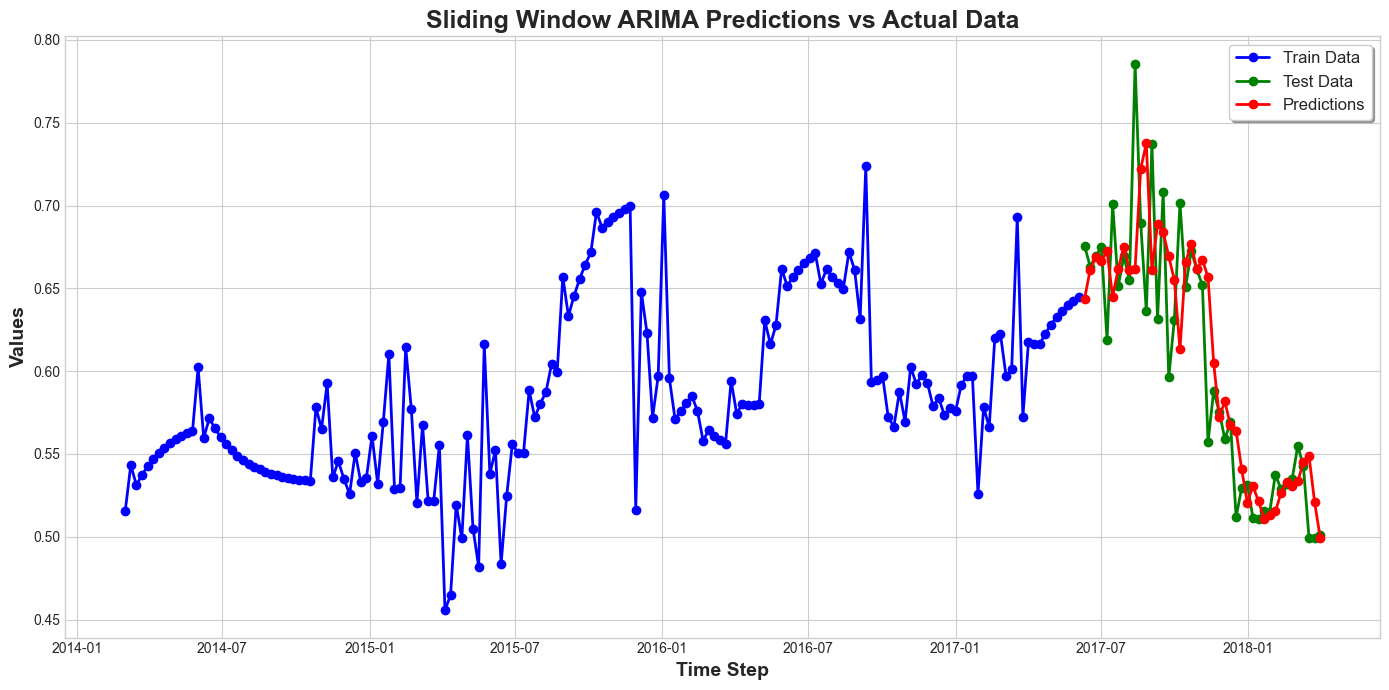

In [51]:
# Apply the Seaborn style
plt.style.use('seaborn-v0_8-whitegrid')

# Create the plot with a specified figure size
plt.figure(figsize=(14, 7))  # Increased size for better visibility and consistency with previous plots
plt.plot(train_data_sliding_arima.index, train_data_sliding_arima, label='Train Data', color='blue', marker='o', linestyle='-', linewidth=2)  # Enhanced train data plotting
plt.plot(test_data_sliding_arima.index, all_actuals, label='Test Data', color='green', marker='o', linestyle='-', linewidth=2)  # Enhanced actual test data plotting
plt.plot(test_data_sliding_arima.index, all_predictions, label='Predictions', color='red', marker='o', linestyle='-', linewidth=2)  # Enhanced predictions plotting

# Set titles and labels with adjusted font sizes and weights
plt.title('Sliding Window ARIMA Predictions vs Actual Data', fontsize=18, fontweight='bold')
plt.xlabel('Time Step', fontsize=14, fontweight='bold')
plt.ylabel('Values', fontsize=14, fontweight='bold')

# Adjust the legend
plt.legend(fontsize=12, frameon=True, shadow=True)

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

## LSTM 

In [52]:
# Import TensorFlow's Keras modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping

# Import scikit-optimize modules for hyperparameter optimization
from skopt import gp_minimize
from skopt.space import Real, Categorical, Integer
from skopt.utils import use_named_args
from sklearn.metrics import mean_squared_error, mean_absolute_error




In [53]:
data = weekly_resampled_data.values  

# Reshape data for LSTM input (samples, timesteps, features)
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back)]
        X.append(a)
        Y.append(dataset[i + look_back])
    return np.array(X), np.array(Y)

look_back = 1  # This can be optimized later
X, y = create_dataset(data, look_back)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [54]:
# splittng data 
train_X, train_y = create_dataset(train_data, look_back)
train_X = np.reshape(train_X, (train_X.shape[0], train_X.shape[1], 1))

validation_X, validation_y = create_dataset(validation_data, look_back)
validation_X = np.reshape(validation_X, (validation_X.shape[0], validation_X.shape[1], 1))

test_X, test_y = create_dataset(test_data, look_back)
test_X = np.reshape(test_X, (test_X.shape[0], test_X.shape[1], 1))


/var/folders/tv/bjxgwfxn7578_3m4cl8608dm0000gn/T/ipykernel_48540/266999044.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Y.append(dataset[i + look_back])


In [55]:
# Define the model with potential regularization
def build_model(lstm_units, dropout_rate, optimizer='adam', l2_reg=0.01):
    #print("Building model with:", lstm_units, "LSTM units,", dropout_rate, "dropout rate,", optimizer, "optimizer,", l2_reg, "L2 regularization")
    
    model = Sequential([
        Input(shape=(look_back, 1)),  # Define the input shape explicitly using an Input layer
        LSTM(int(lstm_units), kernel_regularizer=l2(l2_reg)),
        Dropout(float(dropout_rate)),
        Dense(1)
    ])
    
    if optimizer == 'adam':
        opt = Adam()
    elif optimizer == 'rmsprop':
        opt = RMSprop()
    
    model.compile(loss='mean_squared_error', optimizer=opt, metrics=['mean_squared_error'])
    return model

# Bayesian Optimization space including L2 regularization
space  = [
    Integer(10, 100, name='lstm_units'),  # Reduced the range of LSTM units
    Real(0.1, 0.5, name='dropout_rate'),
    Categorical(['adam', 'rmsprop'], name='optimizer'),
    Real(0.001, 0.1, name='l2_reg')  # L2 regularization
]

@use_named_args(space)
def objective(**params):
    #print("Parameters:", params)  # Print parameters to debug
    model = build_model(**params)
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    model.fit(train_X, train_y, epochs=100, validation_data=(validation_X, validation_y), callbacks=[early_stopping], verbose=0)
    val_loss, val_mse = model.evaluate(validation_X, validation_y, verbose=0)
    print("Validation MSE:", val_mse)  # Print MSE to debug
    return val_mse

# Build the model using the optimized parameters
def build_final_model(lstm_units, dropout_rate, optimizer, l2_reg):
    model = Sequential([
        Input(shape=(look_back, 1)),
        LSTM(int(lstm_units), kernel_regularizer=l2(float(l2_reg))),
        Dropout(float(dropout_rate)),
        Dense(1)
    ])
    
    if optimizer == 'adam':
        opt = Adam()
    elif optimizer == 'rmsprop':
        opt = RMSprop()
    
    model.compile(loss='mean_squared_error', optimizer=opt, metrics=['mean_squared_error'])
    return model

In [56]:
# runnin the bayesian optimization
result = gp_minimize(objective, space, n_calls=30, random_state=0)
print("Best parameters:", result.x)
print("Best validation MSE:", result.fun)



Validation MSE: 0.000986595405265689


Validation MSE: 0.0012021958827972412


Validation MSE: 0.0010730116628110409


Validation MSE: 0.0018583603668957949


Validation MSE: 0.001836927141994238


Validation MSE: 0.0009906329214572906


Validation MSE: 0.0009685650002211332


Validation MSE: 0.0019279458792880177


Validation MSE: 0.0015847939066588879
Validation MSE: 0.0011368808336555958


Validation MSE: 0.0008432462345808744


Validation MSE: 0.0011695513967424631


Validation MSE: 0.0016383589245378971


Validation MSE: 0.001388659467920661


Validation MSE: 0.0011380624491721392


Validation MSE: 0.0015440955758094788


Validation MSE: 0.0013769535580649972


Validation MSE: 0.0009448174969293177


Validation MSE: 0.0009701713570393622


Validation MSE: 0.0008519882103428245


Validation MSE: 0.0013777673011645675


Validation MSE: 0.0008436771458946168


Validation MSE: 0.0009781356202438474


Validation MSE: 0.0012523009208962321


Validation MSE: 0.002006678143516183


Validation MSE: 0.0009313953923992813


Validation MSE: 0.001300621428526938


Validation MSE: 0.0013468042016029358


Validation MSE: 0.001816923264414072


Validation MSE: 0.001418363768607378
Best parameters: [100, 0.39039107536420603, 'rmsprop', 0.001]
Best validation MSE: 0.0008432462345808744


In [57]:
# store the best hyperparameters
best_params = result.x
best_lstm_units, best_dropout_rate, best_optimizer, best_l2_reg = best_params

# Create the final model with the best parameters
final_model = build_final_model(
    lstm_units=int(best_lstm_units),
    dropout_rate=float(best_dropout_rate),
    optimizer=best_optimizer,
    l2_reg=float(best_l2_reg)
)

# Fit the model on the training data
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = final_model.fit(
    train_X, train_y, 
    epochs=100, 
    validation_data=(validation_X, validation_y),
    callbacks=[early_stopping], 
    verbose=1
)



Epoch 1/100
5/5 [==============================] - 2s 162ms/step - loss: 0.3114 - mean_squared_error: 0.3094 - val_loss: 0.2881 - val_mean_squared_error: 0.2862
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 0.2561 - mean_squared_error: 0.2541 - val_loss: 0.2435 - val_mean_squared_error: 0.2415
Epoch 3/100
5/5 [==============================] - 0s 5ms/step - loss: 0.2125 - mean_squared_error: 0.2105 - val_loss: 0.2067 - val_mean_squared_error: 0.2048
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1792 - mean_squared_error: 0.1773 - val_loss: 0.1739 - val_mean_squared_error: 0.1720
Epoch 5/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1496 - mean_squared_error: 0.1476 - val_loss: 0.1437 - val_mean_squared_error: 0.1418
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1212 - mean_squared_error: 0.1193 - val_loss: 0.1162 - val_mean_squared_error: 0.1142
Epoch 7/100
5/5 [===========================

In [58]:
# Making predictions
test_predictions = final_model.predict(test_X)

# Calculating errors
test_mse = mean_squared_error(test_y, test_predictions)
test_rmse = np.sqrt(test_mse)  # Root Mean Squared Error
test_mae = mean_absolute_error(test_y, test_predictions)  # Mean Absolute Error

# Printing errors
print("Test MSE:", test_mse)
print("Test RMSE:", test_rmse)
print("Test MAE:", test_mae)

2/2 [==============================] - 0s 1ms/step
Test MSE: 0.0034152848751531606
Test RMSE: 0.05844043869747352
Test MAE: 0.04791299965181225


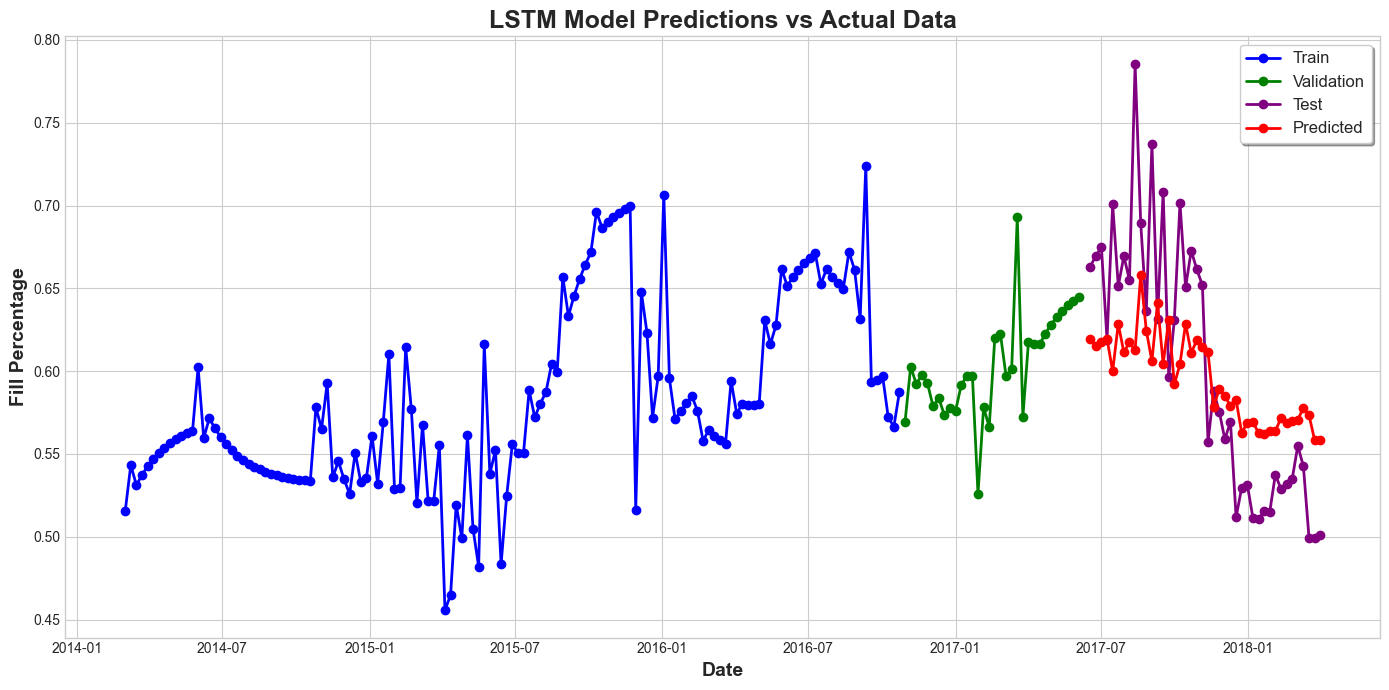

In [59]:
# Adjust the index for plotting, assuming time series forecasting
test_index_lstm = test_data.index[look_back:]  # Adjust index for look_back period

# Convert predictions to a DataFrame for easier plotting
test_predictions_df = pd.DataFrame(test_predictions.squeeze(), index=test_index_lstm, columns=['Predicted'])

# Combine with the actual test data for plotting
test_combined = pd.concat([test_data.iloc[look_back:], test_predictions_df], axis=1)

# Apply the Seaborn style
plt.style.use('seaborn-v0_8-whitegrid')

# Create the plot with a specified figure size
plt.figure(figsize=(14, 7))  # Adjusted size for better visibility and consistency
plt.plot(train_data.index, train_data, label='Train', marker='o', linestyle='-', color='blue', linewidth=2)
plt.plot(validation_data.index, validation_data, label='Validation', marker='o', linestyle='-', color='green', linewidth=2)
plt.plot(test_combined.index, test_combined['fill_pct'], label='Test', marker='o', linestyle='-', color='purple', linewidth=2)
plt.plot(test_combined.index, test_combined['Predicted'], label='Predicted', color='red', marker='o', linestyle='-', linewidth=2)

# Set titles and labels with adjusted font sizes and weights
plt.title('LSTM Model Predictions vs Actual Data', fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=14, fontweight='bold')
plt.ylabel('Fill Percentage', fontsize=14, fontweight='bold')

# Adjust the legend
plt.legend(fontsize=12, frameon=True, shadow=True)

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

## OPTIMIZATION

In [117]:
# creating the dataset for the optmization 
df_9294_tank_volume = df_9294_subset.drop(['Location'], axis=1)

# set image_time_round_day as index
df_9294_tank_volume = df_9294_tank_volume.set_index('image_time_round_day')

# rename the index date
df_9294_tank_volume.index.names = ['date']
# changing the column name
df_9294_tank_volume.rename(columns={'tank volume': 'tank_volume'}, inplace=True)

# save as csv
df_9294_tank_volume.to_csv('df_9294_tank_volume.csv')

df_9294_tank_volume


,tank_id,max_vol,fill_pct,tank_volume
date,,,,
2014-01-22,0a7add45-77bc-4381-a599-3e9b67de89ee,172503.258974,0.267927,46218.302496
2014-01-22,10b8a498-96ba-4372-9f58-130bb7d4d8ed,88310.831203,0.421111,37188.700141
2014-01-22,51d967dd-bf1a-4925-9263-090833345186,76798.574548,0.323487,24843.356725
2014-01-22,5246a78f-235e-4ae9-bd6d-1642d4e40dcf,80255.897759,0.275189,22085.531728
2014-01-22,8a6f4a9a-0d25-4088-80b1-50520009bbb9,76077.393395,0.274932,20916.087823
...,...,...,...,...
2018-03-25,c3946229-b4f9-440f-bcd4-2ccafb9cd73d,341268.257932,0.382124,130406.656998
2018-03-25,d6fc92ad-4add-4f47-8773-40faf4172061,84579.803151,0.298462,25243.816702
2018-03-25,dfb85f0d-6477-4df2-8100-ae07ab5e1e4c,193228.265613,0.288909,55825.338820


In [118]:
# store the data in a excel file
df_9294_subset.to_csv('df_9294_subset.csv', index = False)

# print at this date 2017-06-10 
#print(df_9294_subset[df_9294_subset['image_time_round_day'] == '2017-06-10'])

# creae a subset for this date
df_9294_subset_date = df_9294_subset[df_9294_subset['image_time_round_day'] == '2017-06-10']

# Set 'image_time_round_day' as index and name it 'date'
df_9294_subset_date.set_index('image_time_round_day', inplace=True)
df_9294_subset_date.index.name = 'date'

# drop location from df_9294_subset_date
df_9294_subset_date = df_9294_subset_date.drop('Location', axis=1)

# create a csv file for df_9294_subset_date
df_9294_subset_date.to_csv('df_9294_subset_date.csv')

#df_9294_subset_date

In [119]:
# calculate the sum of the tank volume
total_tank_volume = df_9294_subset_date['tank volume'].sum()

print(round(total_tank_volume, 2))

1338996.66


In [120]:
# predictions dataset 
data_predictions = pd.DataFrame({
    'date': test_lagged.index,
    'fill_pct': predicted_mean_test_sliding
})

# set the 'date' column as index
data_predictions.set_index('date', inplace=True)

# create a column max_vol
data_predictions['max_vol'] = max_vol

# create the tanks_volume column
data_predictions['tanks_volume'] = data_predictions['max_vol'] * data_predictions['fill_pct']

# store the tanks_volume for the first entry
new_total_tanks_volume = data_predictions['tanks_volume'].iloc[0]
print(new_total_tanks_volume)

# output data predictions as csv
data_predictions.to_csv('data_predictions.csv')

# print the first entries of the dataset
data_predictions.head()




1524940.0719948807


,fill_pct,max_vol,tanks_volume
date,,,
2017-08-06,0.658639,2.315290e+06,1.524940e+06
2017-08-13,0.670087,2.315290e+06,1.551445e+06
2017-08-20,0.650302,2.315290e+06,1.505639e+06
2017-08-27,0.648182,2.315290e+06,1.500730e+06
2017-09-03,0.682249,2.315290e+06,1.579604e+06


In [121]:
# defining a function to retrieve data for the optmization
def get_tank_data(input_date):
    # Convert the date columns to datetime type for comparison
    data_predictions['date'] = pd.to_datetime(data_predictions['date'])
    df_9294_tank_volume['date'] = pd.to_datetime(df_9294_tank_volume['date'])

    # Retrieve the tanks_volume for the given date from data_predictions
    future_total_tanks_volume = data_predictions[data_predictions['date'] == pd.to_datetime(input_date)]['tanks_volume'].iloc[0]

    # Find the closest previous date in df_9294_tank_volume to the input date
    max_date = df_9294_tank_volume[df_9294_tank_volume['date'] < pd.to_datetime(input_date)]['date'].max()
    # Filter df_9294_tank_volume for the closest date and extract tank volumes
    tank_data = df_9294_tank_volume[df_9294_tank_volume['date'] == max_date]

    # Create a dictionary with tank_id as keys and tank_volume as values
    tank_volumes = dict(zip(tank_data['tank_id'], tank_data['fill_pct', 'max_vol', 'tank_volume']))
    
    # calculating the actual total tank volume
    actual_total_tanks_volumes = tank_data['tank_volume'].sum()

    return future_total_tanks_volume, tank_volumes, actual_total_tanks_volumes, max_date



In [122]:
def get_tank_data(input_date):
    # Convert the index to datetime type for comparison, if it's not already
    if not pd.api.types.is_datetime64_any_dtype(data_predictions.index):
        data_predictions.index = pd.to_datetime(data_predictions.index)
    
    if not pd.api.types.is_datetime64_any_dtype(df_9294_tank_volume.index):
        df_9294_tank_volume.index = pd.to_datetime(df_9294_tank_volume.index)

    # Retrieve tank volumes for the given input date from df_9294_tank_volume
    if pd.to_datetime(input_date) in df_9294_tank_volume.index:
        tank_data = df_9294_tank_volume.loc[pd.to_datetime(input_date)]
        # Create a dictionary with tank_id as keys and their volumes as values
        tank_volumes = {row['tank_id']: {'fill_pct': row['fill_pct'], 'max_vol': row['max_vol'], 'tank_volume': row['tank_volume']} for idx, row in tank_data.iterrows()}
        # Calculating the actual total tank volume
        actual_total_tanks_volumes = tank_data['tank_volume'].sum()
    else:
        return None, None, None, None  # No tank data for the given date

    # Find the first future date in data_predictions relative to the input date
    future_dates = data_predictions.index[data_predictions.index > pd.to_datetime(input_date)]
    if not future_dates.empty:
        next_date = future_dates.min()
        future_total_tanks_volume = data_predictions.loc[next_date, 'tanks_volume']
    else:
        return None, tank_volumes, actual_total_tanks_volumes, None  # No future dates available

    return future_total_tanks_volume, tank_volumes, actual_total_tanks_volumes, next_date


In [123]:
def plot_optimized_tank_fill_pct(optimized_tank_volumes, title):
    # Extract the tank IDs and their corresponding fill percentages
    tank_ids = list(optimized_tank_volumes.keys())
    fill_pcts = [info['fill_pct'] for info in optimized_tank_volumes.values()]

    # Apply the Seaborn style
    plt.style.use('seaborn-v0_8-whitegrid')

    # Set up the bar plot with a specified figure size
    plt.figure(figsize=(16, 8))  # Increased size for better visibility and consistency
    plt.bar(tank_ids, fill_pcts, color='green', alpha=1)

    # Adding labels and title with adjusted font sizes and weights
    plt.xlabel('Tank ID', fontsize=14, fontweight='bold')
    plt.ylabel('Fill Percentage', fontsize=14, fontweight='bold')
    plt.title(title, fontsize=18, fontweight='bold')
    plt.xticks(rotation=70)  # Rotate tank IDs on X-axis for better readability

    # Adjust layout for better spacing
    plt.tight_layout()

    # Display the bar plot
    plt.show()

In [124]:
def plot_optimized_tank_Volume(optimized_tank_volumes, title):
    # Extract the tank IDs and their corresponding fill percentages
    tank_ids = list(optimized_tank_volumes.keys())
    fill_pcts = [info['tank_volume'] for info in optimized_tank_volumes.values()]

    # Apply the Seaborn style
    plt.style.use('seaborn-v0_8-whitegrid')

    # Set up the bar plot with a specified figure size
    plt.figure(figsize=(16, 8))  # Increased size for better visibility and consistency
    plt.bar(tank_ids, fill_pcts, color='blue', alpha=1)

    # Adding labels and title with adjusted font sizes and weights
    plt.xlabel('Tank ID', fontsize=14, fontweight='bold')
    plt.ylabel('Fill Percentage', fontsize=14, fontweight='bold')
    plt.title(title, fontsize=18, fontweight='bold')
    plt.xticks(rotation=70)  # Rotate tank IDs on X-axis for better readability

    # Adjust layout for better spacing
    plt.tight_layout()

    # Display the bar plot
    plt.show()

In [125]:
def plot_compare_tank_volume(actual_tank_volume, optimized_tank_volumes, title):
    # Extract the tank IDs and their corresponding volumes
    tank_ids = list(actual_tank_volume.keys())
    actual_volumes = [info['tank_volume'] for info in actual_tank_volume.values()]
    optimized_volumes = [optimized_tank_volumes[id]['tank_volume'] for id in tank_ids]

    # Settings for the bars
    bar_width = 0.35  # Width of the bars
    index = np.arange(len(tank_ids))  # Index for the positions of the bars

    # Apply the Seaborn style
    plt.style.use('seaborn-v0_8-whitegrid')

    # Set up the bar plot with a specified figure size
    plt.figure(figsize=(16, 8))  # Increased size for better visibility and consistency
    plt.bar(index, actual_volumes, bar_width, label='Actual Volume', color='blue', alpha=1)
    plt.bar(index + bar_width, optimized_volumes, bar_width, label='Optimized Volume', color='green', alpha=1)

    # Adding labels and title with adjusted font sizes and weights
    plt.xlabel('Tank ID', fontsize=14, fontweight='bold')
    plt.ylabel('Tank Volume', fontsize=14, fontweight='bold')
    plt.title(title, fontsize=18, fontweight='bold')

    # Set the position of the ticks and x-axis tick labels
    plt.xticks(index + bar_width / 2, tank_ids, rotation=70)

    # Add a legend to distinguish between actual and optimized volumes
    plt.legend()

    # Adjust layout for better spacing
    plt.tight_layout()

    # Display the bar plot
    plt.show()


In [126]:
def plot_compare_tank_fill_pct(actual_tank_fill, optimized_tank_volumes, title):
    # Extract the tank IDs and their corresponding fill percentages
    tank_ids = list(actual_tank_fill.keys())
    actual_fill_pcts = [info['fill_pct'] for info in actual_tank_fill.values()]
    optimized_fill_pcts = [optimized_tank_volumes[id]['fill_pct'] for id in tank_ids]

    # Settings for the bars
    bar_width = 0.35  # Width of the bars
    index = np.arange(len(tank_ids))  # Index for the positions of the bars

    # Apply the Seaborn style
    plt.style.use('seaborn-v0_8-whitegrid')

    # Set up the bar plot with a specified figure size
    plt.figure(figsize=(16, 8))  # Increased size for better visibility and consistency
    plt.bar(index, actual_fill_pcts, bar_width, label='Actual Fill Percentage', color='blue', alpha=0.8)
    plt.bar(index + bar_width, optimized_fill_pcts, bar_width, label='Optimized Fill Percentage', color='green', alpha=0.8)

    # Adding labels and title with adjusted font sizes and weights
    plt.xlabel('Tank ID', fontsize=14, fontweight='bold')
    plt.ylabel('Fill Percentage (%)', fontsize=14, fontweight='bold')
    plt.title(title, fontsize=18, fontweight='bold')

    # Set the position of the ticks and x-axis tick labels
    plt.xticks(index + bar_width / 2, tank_ids, rotation=70)

    # Add a legend to distinguish between actual and optimized fill percentages
    plt.legend()

    # Adjust layout for better spacing
    plt.tight_layout()

    # Display the bar plot
    plt.show()

In [127]:
# Define the test date
input_date = '2017-06-10'

# Call the function with the test date
result = get_tank_data(input_date)

# Unpack the results
future_total_tanks_volume, tank_volumes, actual_total_tanks_volumes, next_date = result

# Check if the function returned any data
if result == (None, None, None, None):
    print("No data available for the given date.")
else:
    # Print the outputs in the required format
    print("Input date:", input_date)
    print("Future total tanks volume:", future_total_tanks_volume)
    print("Max date:", next_date)
    print("Tank volumes on future date:", tank_volumes)
    print("Actual total tanks volume on max date:", actual_total_tanks_volumes)


Input date: 2017-06-10
Future total tanks volume: 1524940.0719948807
Max date: 2017-08-06 00:00:00
Tank volumes on future date: {'0a7add45-77bc-4381-a599-3e9b67de89ee': {'fill_pct': 0.425194008793081, 'max_vol': 172503.258974048, 'tank_volume': 73347.35221304648}, '10b8a498-96ba-4372-9f58-130bb7d4d8ed': {'fill_pct': 0.396006812499119, 'max_vol': 88310.8312030654, 'tank_volume': 34971.69077387367}, '51d967dd-bf1a-4925-9263-090833345186': {'fill_pct': 0.968477617818198, 'max_vol': 76798.5745481821, 'tank_volume': 74377.7005302567}, '5246a78f-235e-4ae9-bd6d-1642d4e40dcf': {'fill_pct': 0.961963563882754, 'max_vol': 80255.8977585394, 'tank_volume': 77203.2494304145}, '8a6f4a9a-0d25-4088-80b1-50520009bbb9': {'fill_pct': 0.621338171581987, 'max_vol': 76077.3933954922, 'tank_volume': 47269.78851107865}, '9606ab5e-f277-4daa-9b6e-971f1404c30d': {'fill_pct': 0.170120106844067, 'max_vol': 211696.093311596, 'tank_volume': 36013.76201264029}, '9edea7ec-9274-45f6-9588-80f4b41e994c': {'fill_pct': 1.0,

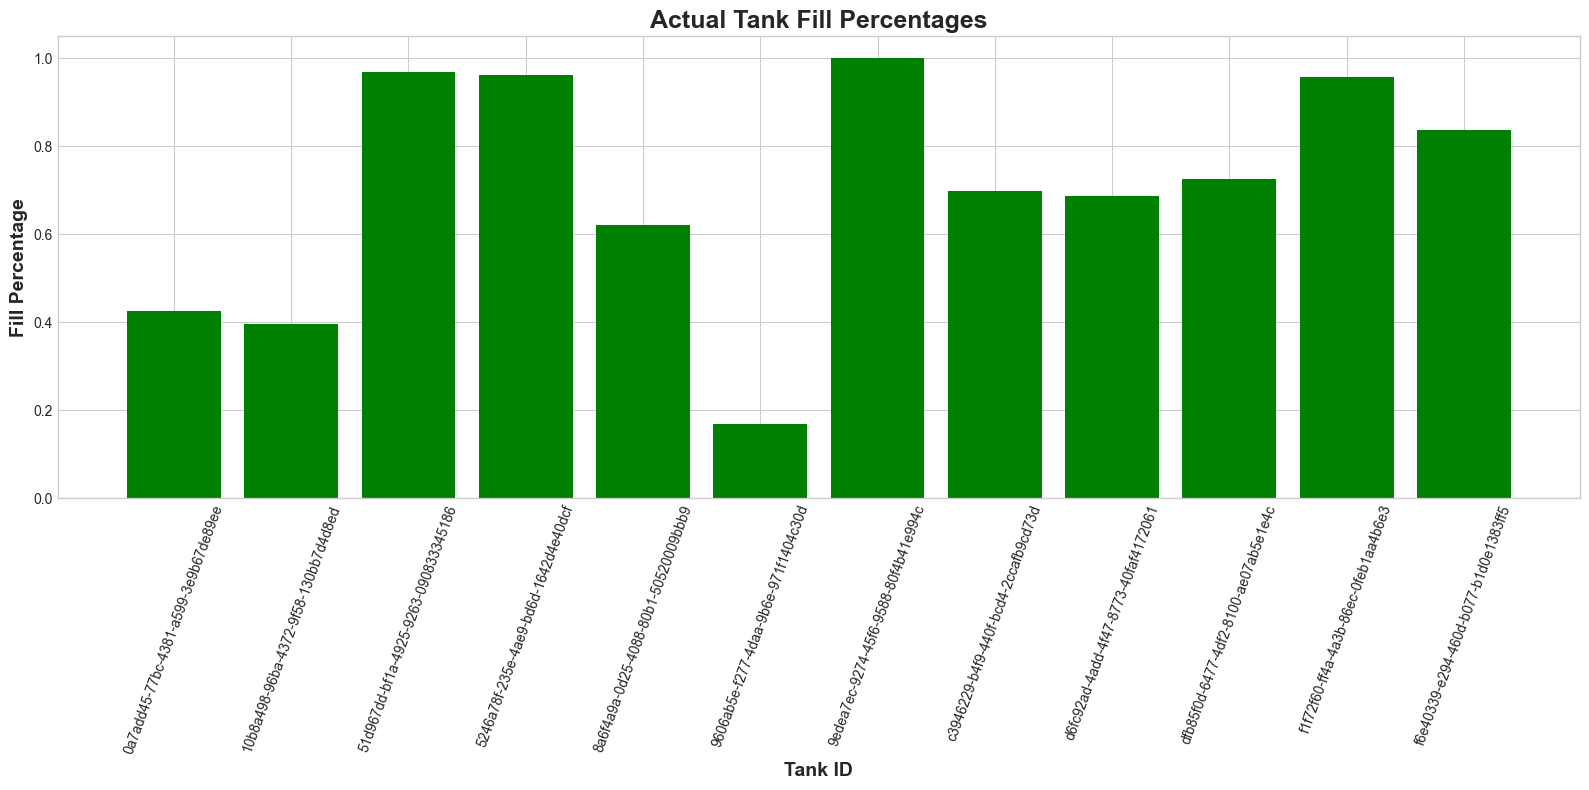

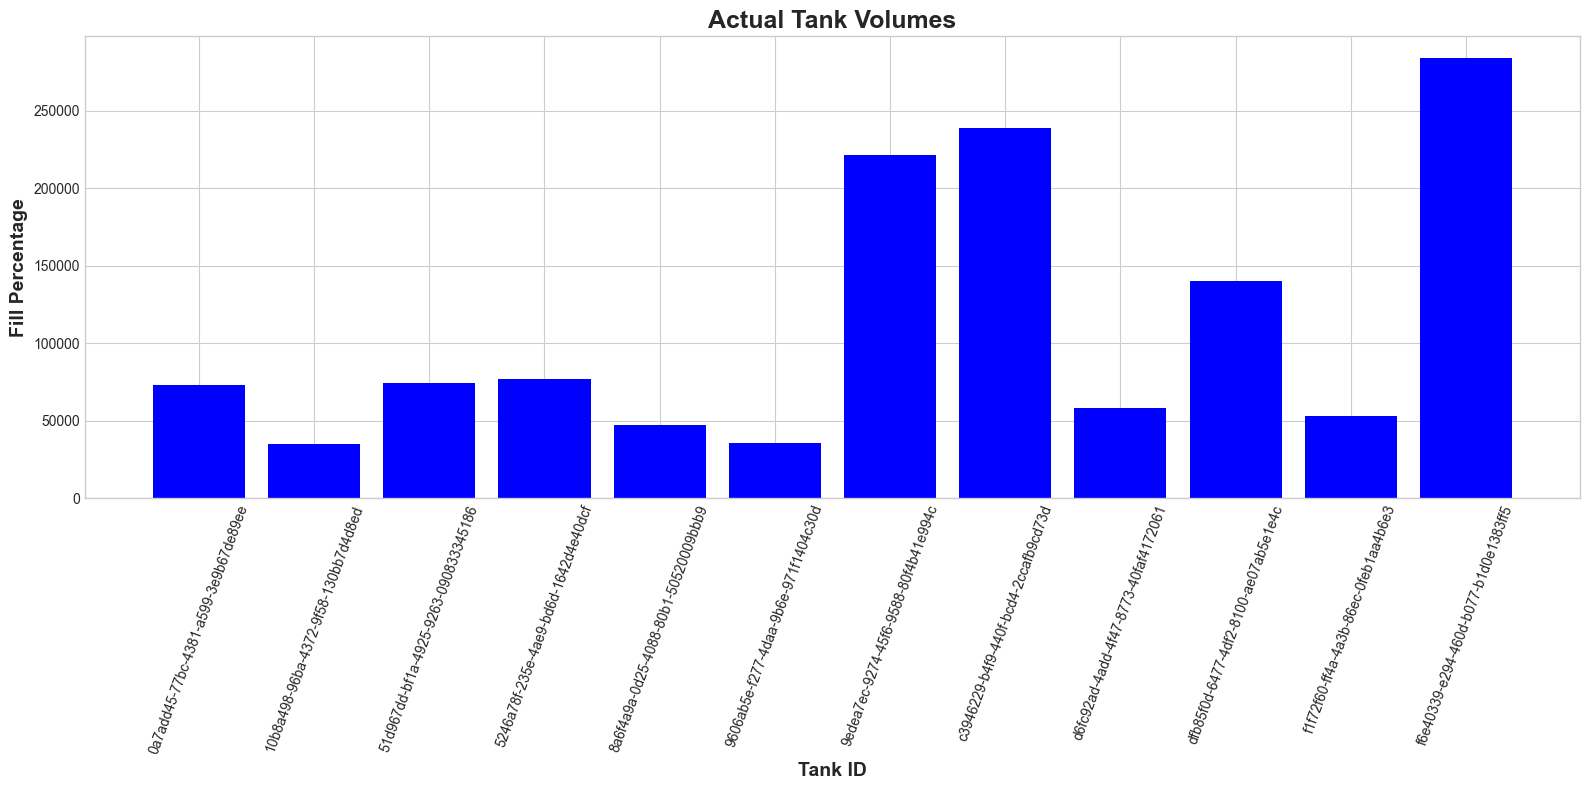

In [128]:
plot_optimized_tank_fill_pct(tank_volumes, "Actual Tank Fill Percentages")
plot_optimized_tank_Volume(tank_volumes, "Actual Tank Volumes")

In [129]:
## FUTURE OPTMIZATION


def overtime_optimize_tank_volumes(input_date):
    # Retrieve tank data using the previously defined get_tank_data function
    future_total_tanks_volume, tank_volumes, actual_total_tanks_volumes, next_date = get_tank_data(input_date)
    
    if tank_volumes is None:
        print("No tank data available for date:", input_date)
        return None

    # Calculate the volume difference needed
    volume_difference = future_total_tanks_volume - actual_total_tanks_volumes

    # Prepare a list of tanks sorted by the possibility to change (less filled first if adding volume, more filled first if removing volume)
    if volume_difference > 0:
        # Sort tanks by increasing fill_pct (focus on less filled tanks first for adding volume)
        sorted_tanks = sorted(tank_volumes.items(), key=lambda x: x[1]['fill_pct'])
    else:
        # Sort tanks by decreasing fill_pct (focus on more filled tanks first for removing volume)
        sorted_tanks = sorted(tank_volumes.items(), key=lambda x: x[1]['fill_pct'], reverse=True)

    # Apply volume adjustments
    for tank_id, tank_info in sorted_tanks:
        max_possible_vol = tank_info['max_vol']
        current_vol = tank_info['tank_volume']
        max_adjustable_vol = max_possible_vol - current_vol if volume_difference > 0 else current_vol

        # Determine the volume to adjust
        adjust_volume = min(abs(volume_difference), max_adjustable_vol)

        if volume_difference > 0:
            # Increase the tank volume
            tank_info['tank_volume'] += adjust_volume
            volume_difference -= adjust_volume
        else:
            # Decrease the tank volume
            tank_info['tank_volume'] -= adjust_volume
            volume_difference += adjust_volume

        # Update fill percentage based on the new volume
        tank_info['fill_pct'] = tank_info['tank_volume'] / max_possible_vol

        if abs(volume_difference) < 1e-6:  # Close to zero, stop adjusting
            break

    # Update the tank_volumes dictionary with adjusted values
    for tank_id, tank_info in sorted_tanks:
        tank_volumes[tank_id] = tank_info

    return tank_volumes, next_date


In [130]:
input_date = '2017-06-10'
optimized_tank_volumes, next_date = overtime_optimize_tank_volumes(input_date)

print("Optimized Tank Volumes on", next_date, ":", optimized_tank_volumes)


Optimized Tank Volumes on 2017-08-06 00:00:00 : {'0a7add45-77bc-4381-a599-3e9b67de89ee': {'fill_pct': 0.425194008793081, 'max_vol': 172503.258974048, 'tank_volume': 73347.35221304648}, '10b8a498-96ba-4372-9f58-130bb7d4d8ed': {'fill_pct': 0.5121995704112637, 'max_vol': 88310.8312030654, 'tank_volume': 45232.76980487172}, '51d967dd-bf1a-4925-9263-090833345186': {'fill_pct': 0.968477617818198, 'max_vol': 76798.5745481821, 'tank_volume': 74377.7005302567}, '5246a78f-235e-4ae9-bd6d-1642d4e40dcf': {'fill_pct': 0.961963563882754, 'max_vol': 80255.8977585394, 'tank_volume': 77203.2494304145}, '8a6f4a9a-0d25-4088-80b1-50520009bbb9': {'fill_pct': 0.621338171581987, 'max_vol': 76077.3933954922, 'tank_volume': 47269.78851107865}, '9606ab5e-f277-4daa-9b6e-971f1404c30d': {'fill_pct': 1.0000000000000002, 'max_vol': 211696.093311596, 'tank_volume': 211696.09331159602}, '9edea7ec-9274-45f6-9588-80f4b41e994c': {'fill_pct': 1.0, 'max_vol': 221577.621716084, 'tank_volume': 221577.621716084}, 'c3946229-b4f

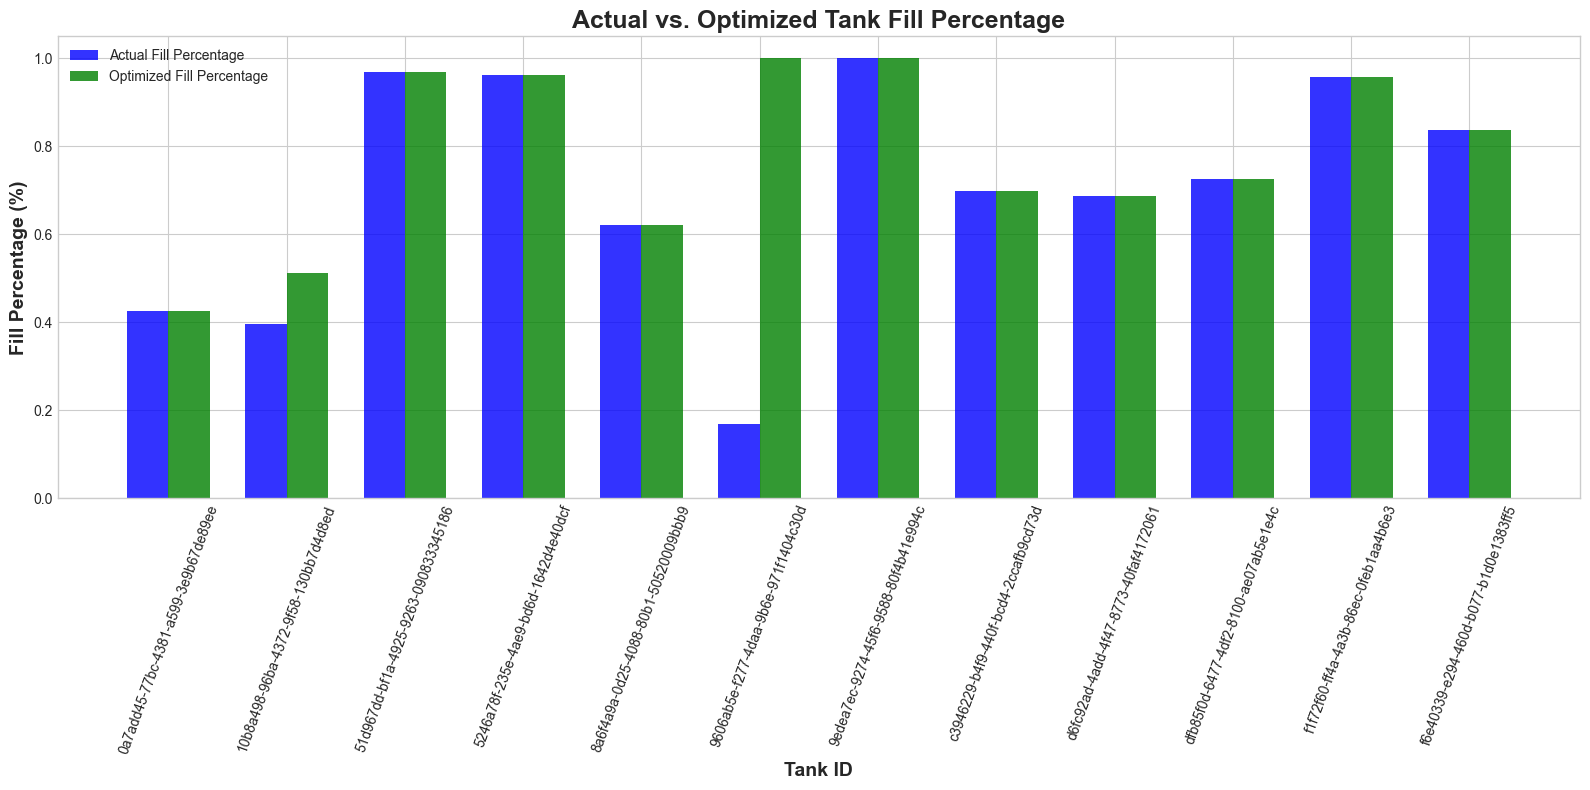

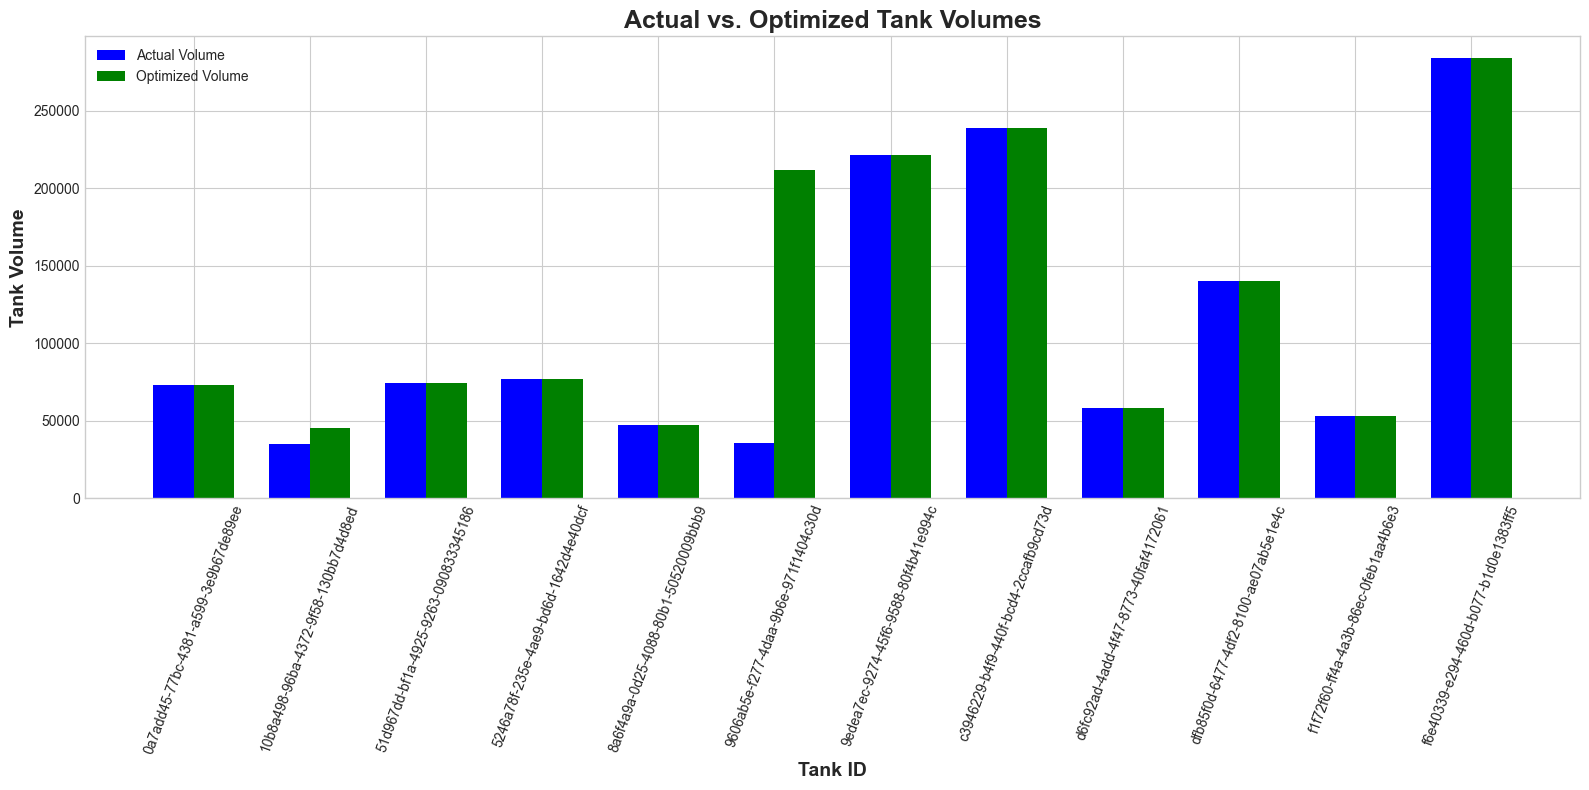

In [131]:
plot_compare_tank_fill_pct(tank_volumes, optimized_tank_volumes, 'Actual vs. Optimized Tank Fill Percentage')
plot_compare_tank_volume(tank_volumes, optimized_tank_volumes, 'Actual vs. Optimized Tank Volumes')

In [132]:
## IMMEDIATE REALLOCATION 

def optimize_internal_tank_volumes(input_date):
    # Retrieve tank data for the specified date
    future_total_tanks_volume, tank_volumes, actual_total_tanks_volumes, next_date = get_tank_data(input_date)
    
    if tank_volumes is None:
        print("No tank data available for the date:", input_date)
        return None

    # Calculate total available volume and total capacity
    total_volume = actual_total_tanks_volumes
    total_capacity = sum(tank['max_vol'] for tank in tank_volumes.values())
    
    # Calculate ideal fill percentage
    ideal_fill_pct = total_volume / total_capacity

    # First pass: Set each tank to the ideal fill percentage of its capacity
    for tank_id, tank_info in tank_volumes.items():
        ideal_volume = tank_info['max_vol'] * ideal_fill_pct
        optimized_volume = min(ideal_volume, tank_info['max_vol'])
        tank_volumes[tank_id]['tank_volume'] = optimized_volume
        tank_volumes[tank_id]['fill_pct'] = optimized_volume / tank_info['max_vol']

    # Second pass: Adjust for any volume discrepancies due to rounding or capacity limits
    actual_total_optimized_volume = sum(tank['tank_volume'] for tank in tank_volumes.values())
    volume_difference = total_volume - actual_total_optimized_volume

    sorted_tanks = sorted(tank_volumes.items(), key=lambda x: x[1]['max_vol'] - x[1]['tank_volume'])
    for tank_id, tank_info in sorted_tanks:
        max_possible_addition = tank_info['max_vol'] - tank_info['tank_volume']
        adjustment = min(volume_difference, max_possible_addition)
        tank_info['tank_volume'] += adjustment
        tank_info['fill_pct'] = tank_info['tank_volume'] / tank_info['max_vol']
        volume_difference -= adjustment
        if volume_difference <= 0:
            break

    return tank_volumes, next_date

In [133]:
input_date = '2017-06-10'
optimized_internal_tank_volumes, next_date = optimize_internal_tank_volumes(input_date)
print("Optimized Internal Tank Volumes on", next_date, ":", optimized_internal_tank_volumes)

Optimized Internal Tank Volumes on 2017-08-06 00:00:00 : {'0a7add45-77bc-4381-a599-3e9b67de89ee': {'fill_pct': 0.6898849940623024, 'max_vol': 172503.258974048, 'tank_volume': 119007.40979303891}, '10b8a498-96ba-4372-9f58-130bb7d4d8ed': {'fill_pct': 0.6898849940623024, 'max_vol': 88310.8312030654, 'tank_volume': 60924.31726016377}, '51d967dd-bf1a-4925-9263-090833345186': {'fill_pct': 0.6898849940623024, 'max_vol': 76798.5745481821, 'tank_volume': 52982.1841461659}, '5246a78f-235e-4ae9-bd6d-1642d4e40dcf': {'fill_pct': 0.6898849940623024, 'max_vol': 80255.8977585394, 'tank_volume': 55367.339548614706}, '8a6f4a9a-0d25-4088-80b1-50520009bbb9': {'fill_pct': 0.6898849940623024, 'max_vol': 76077.3933954922, 'tank_volume': 52484.65209092458}, '9606ab5e-f277-4daa-9b6e-971f1404c30d': {'fill_pct': 0.6898849940623024, 'max_vol': 211696.093311596, 'tank_volume': 146045.95807728302}, '9edea7ec-9274-45f6-9588-80f4b41e994c': {'fill_pct': 0.6898849940623025, 'max_vol': 221577.621716084, 'tank_volume': 1

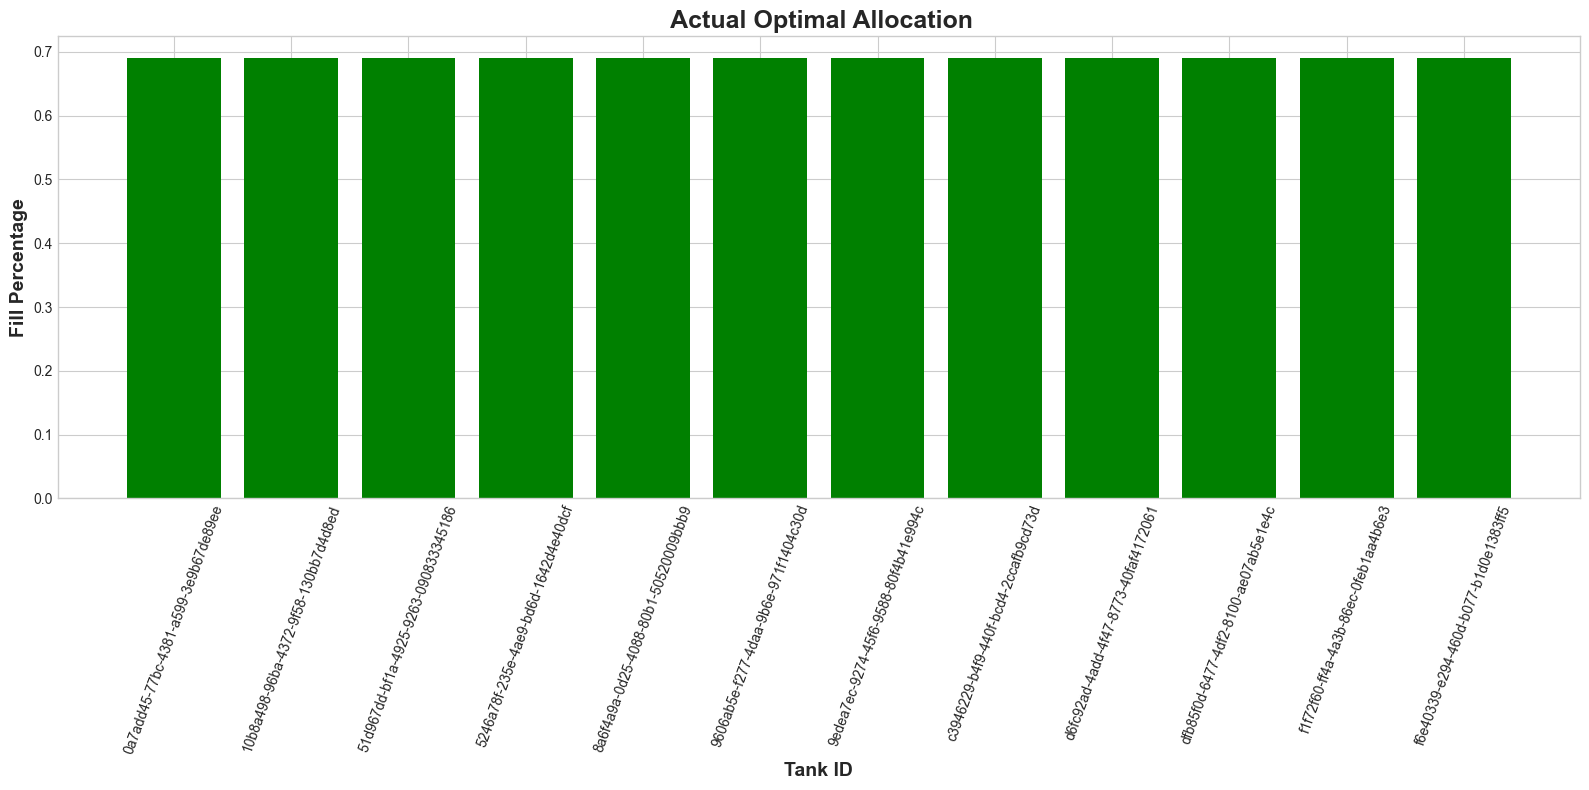

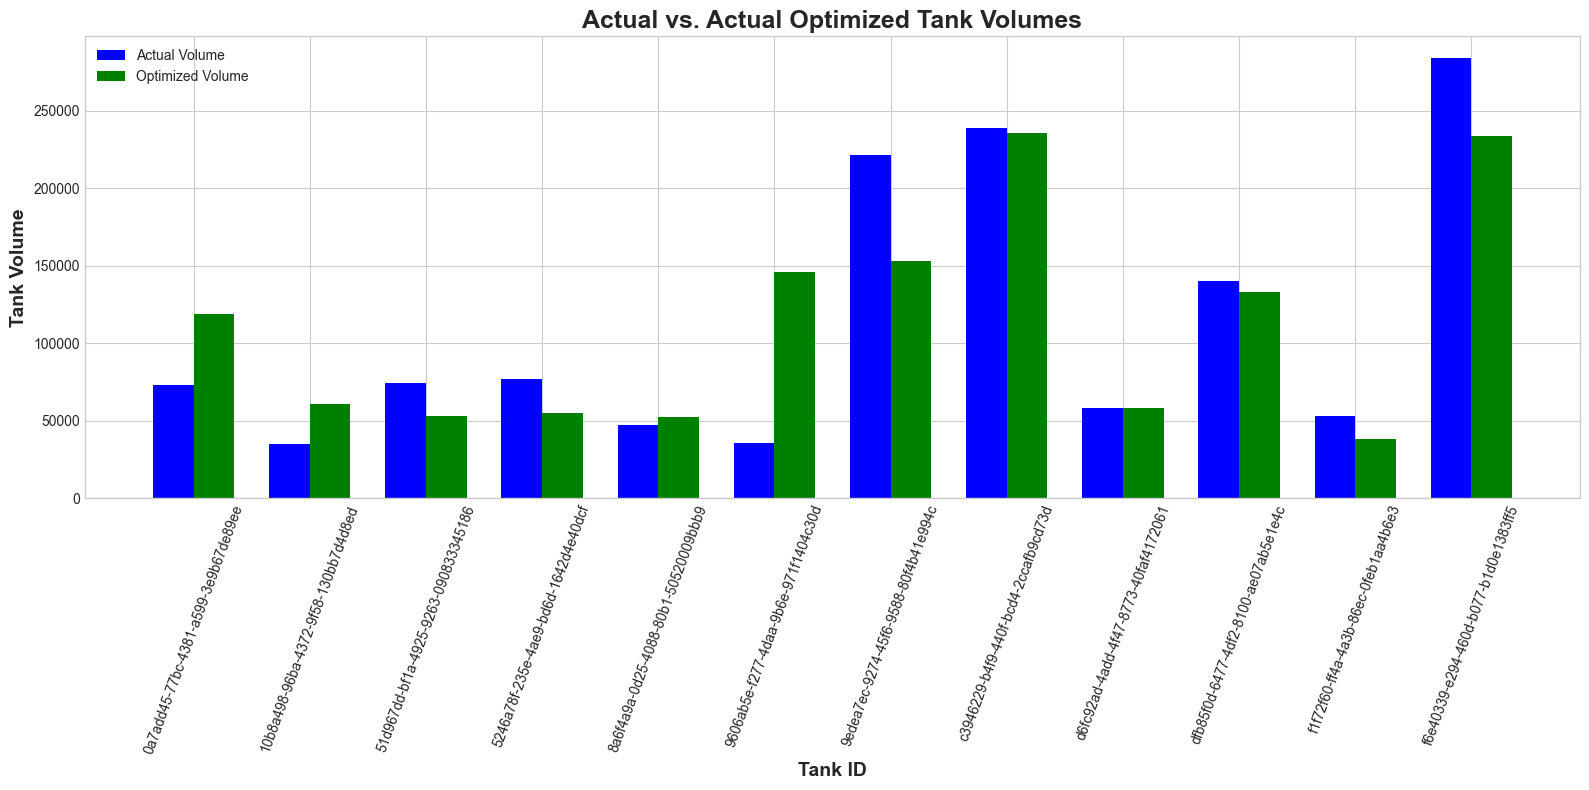

In [134]:
plot_optimized_tank_fill_pct(optimized_internal_tank_volumes, ' Actual Optimal Allocation')
plot_compare_tank_volume(tank_volumes, optimized_internal_tank_volumes, 'Actual vs. Actual Optimized Tank Volumes')